In [ ]:
pip install cmasher

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 8.2 MB/s eta 0:00:00


# Imports

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import cmasher as cmr
from tqdm import tqdm
import numpy as np  # Import numpy for saving npz files
import os
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import gzip
import shutil

# -1. Dataset creation

## LBM Fluid Simulation in Python with JAX | van Karman Vortex Street

### Code vidéo

#### Code cylindre

 97%|█████████▋| 5805/6000 [00:23<00:00, 292.75it/s]

[[0.03979494 0.03987561 0.03987398 ... 0.03989063 0.03986937 0.03977717]
 [0.03979071 0.03998482 0.04006393 ... 0.04000172 0.04003087 0.03984211]
 [0.03983931 0.03993469 0.04004514 ... 0.03999595 0.03997499 0.03989531]
 ...
 [0.04007754 0.04007717 0.04007627 ... 0.04007521 0.04007652 0.0400773 ]
 [0.04007688 0.04007653 0.04007563 ... 0.0400745  0.04007586 0.04007665]
 [0.03980832 0.03988099 0.03990224 ... 0.03990548 0.03988092 0.03980028]]


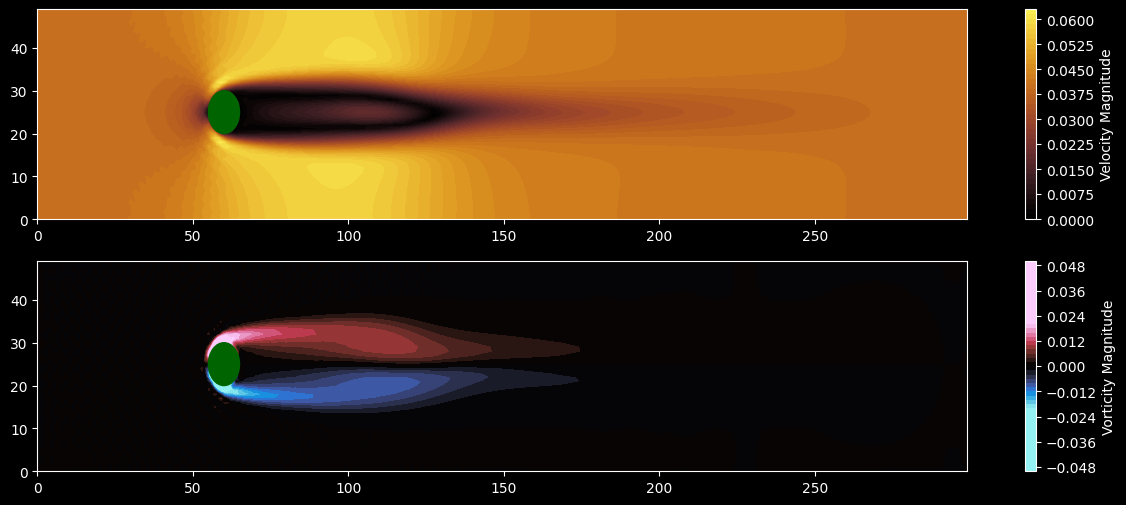

[[0.03983488 0.03990454 0.03989906 ... 0.0399132  0.03989579 0.03981827]
 [0.03982349 0.03999885 0.04007003 ... 0.04000656 0.04004416 0.03987469]
 [0.03986498 0.03995898 0.04006195 ... 0.04001067 0.04000059 0.03992011]
 ...
 [0.04007675 0.04007641 0.04007549 ... 0.04007405 0.04007551 0.04007643]
 [0.0400757  0.04007538 0.04007447 ... 0.04007311 0.04007456 0.04007542]
 [0.03984046 0.03990269 0.03992268 ... 0.03992385 0.03990368 0.03983436]]


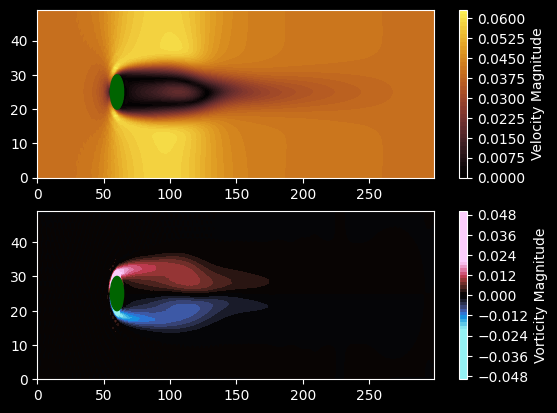

[[0.03990828 0.03994552 0.03993464 ... 0.03994188 0.03993183 0.03988809]
 [0.03987234 0.04000893 0.04006456 ... 0.04000142 0.04005118 0.03992025]
 [0.0398944  0.03998953 0.04007153 ... 0.04001952 0.04002848 0.03994979]
 ...
 [0.04007892 0.04007858 0.04007746 ... 0.04007514 0.04007713 0.04007841]
 [0.04007749 0.04007718 0.04007611 ... 0.04007377 0.04007576 0.04007701]
 [0.03990751 0.03994741 0.03995872 ... 0.03995281 0.03994565 0.03990293]]


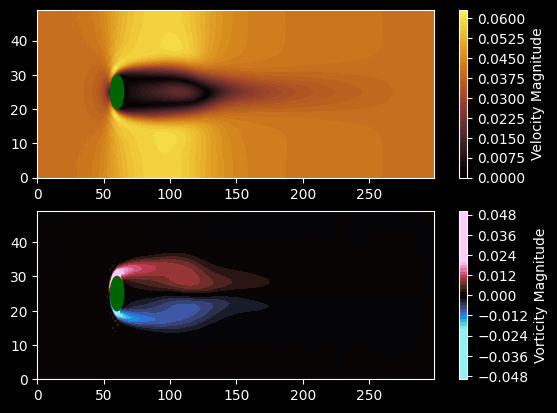

 97%|█████████▋| 5835/6000 [00:25<00:03, 42.35it/s] 

[[0.03993765 0.03995182 0.03994237 ... 0.0399487  0.0399378  0.03991476]
 [0.0398867  0.04000376 0.04005247 ... 0.03999057 0.04004464 0.03993281]
 [0.03990015 0.03999679 0.04006486 ... 0.04001385 0.04003388 0.03995658]
 ...
 [0.04007993 0.04007947 0.04007824 ... 0.04007646 0.04007836 0.04007953]
 [0.04007907 0.04007864 0.04007742 ... 0.04007551 0.04007748 0.04007868]
 [0.03993904 0.03996646 0.03997106 ... 0.03996354 0.03996374 0.03993476]]


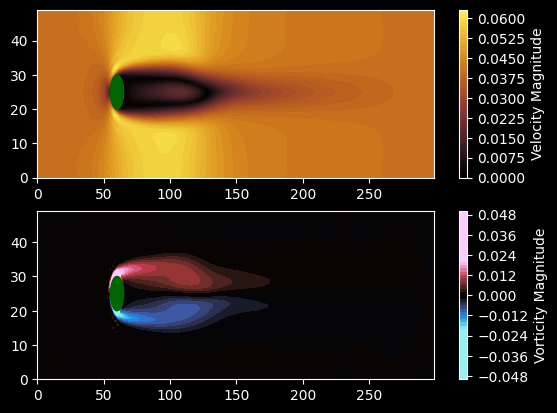

[[0.03988849 0.03991659 0.03991348 ... 0.03992535 0.03990605 0.03986625]
 [0.03984421 0.03998297 0.04004158 ... 0.03998094 0.04002377 0.03988969]
 [0.0398725  0.03996897 0.04004505 ... 0.03999555 0.040006   0.03992904]
 ...
 [0.04007683 0.04007637 0.04007533 ... 0.04007444 0.04007581 0.04007662]
 [0.04007585 0.04007541 0.04007434 ... 0.04007338 0.04007483 0.04007565]
 [0.0399017  0.03994209 0.0399512  ... 0.03994746 0.03994268 0.03989935]]


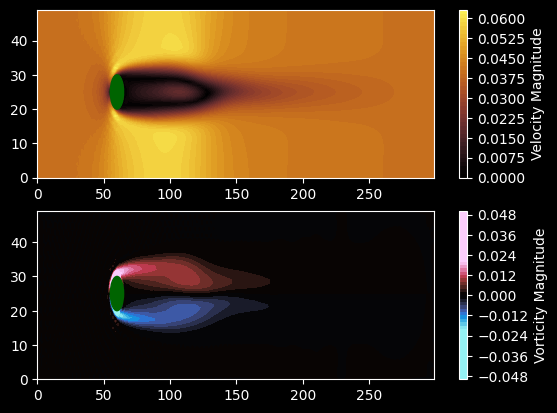

 98%|█████████▊| 5856/6000 [00:27<00:04, 30.42it/s]

[[0.039833   0.03989031 0.03988868 ... 0.03990479 0.039882   0.03981172]
 [0.03979879 0.0399667  0.04003744 ... 0.03997678 0.04000613 0.03984268]
 [0.0398427  0.03993757 0.04002875 ... 0.03997943 0.03997308 0.03989805]
 ...
 [0.04008224 0.04008187 0.04008094 ... 0.04007984 0.04008118 0.04008199]
 [0.04007994 0.04007958 0.04007866 ... 0.04007763 0.04007896 0.04007973]
 [0.03985656 0.03991659 0.03993528 ... 0.0399346  0.03992082 0.03985733]]


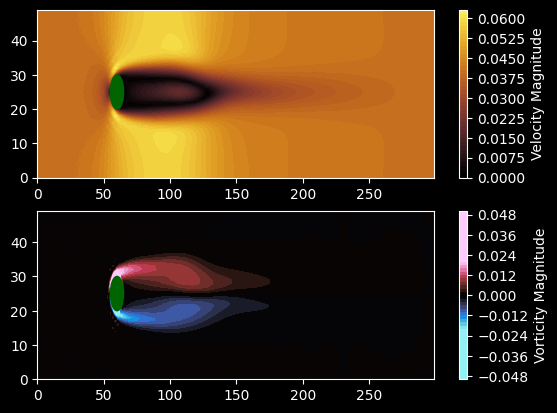

[[0.0398315  0.03989569 0.03988949 ... 0.03990367 0.03988592 0.03980896]
 [0.03979639 0.03996598 0.04003711 ... 0.03997587 0.0400037  0.03983851]
 [0.03983347 0.0399273  0.04002054 ... 0.03997088 0.03995996 0.03988801]
 ...
 [0.04009326 0.04009295 0.04009191 ... 0.04008959 0.04009151 0.04009275]
 [0.04009184 0.04009155 0.04009053 ... 0.04008826 0.04009018 0.04009138]
 [0.0398542  0.03991742 0.03993788 ... 0.03993549 0.0399208  0.03985554]]


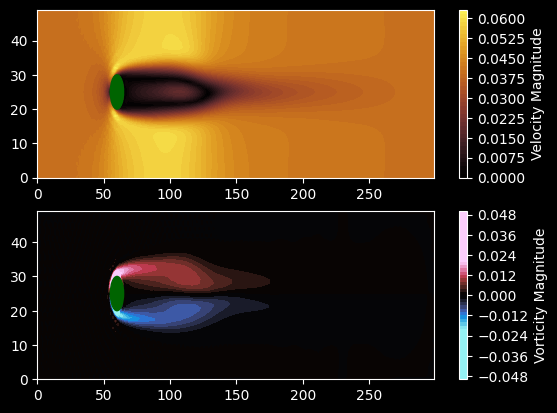

 98%|█████████▊| 5872/6000 [00:29<00:06, 18.79it/s]

[[0.03983223 0.03989294 0.03988691 ... 0.03989869 0.03988239 0.03980884]
 [0.0398016  0.03997062 0.04004157 ... 0.03998027 0.0400101  0.03984543]
 [0.03983255 0.03992689 0.04002018 ... 0.03997113 0.03995948 0.03988782]
 ...
 [0.04009469 0.04009438 0.04009327 ... 0.04009073 0.0400928  0.04009414]
 [0.04009383 0.04009354 0.04009245 ... 0.04008981 0.04009194 0.04009329]
 [0.03985115 0.03991281 0.03992921 ... 0.03992558 0.03991211 0.03984839]]


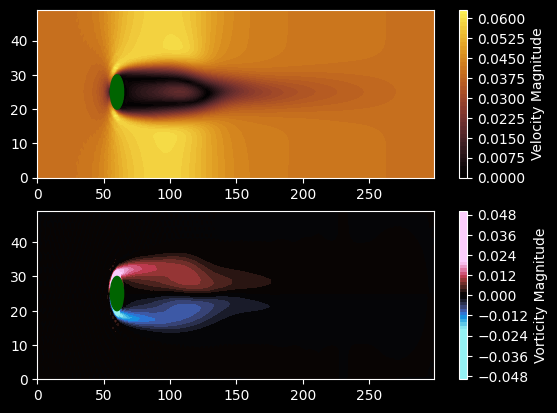

 98%|█████████▊| 5883/6000 [00:30<00:07, 16.69it/s]

[[0.03980502 0.03987647 0.03987496 ... 0.03988991 0.03986906 0.03978486]
 [0.03979104 0.03997563 0.04005314 ... 0.03999145 0.04001981 0.03984013]
 [0.03983275 0.03992609 0.04002934 ... 0.0399806  0.03996337 0.0398888 ]
 ...
 [0.0400954  0.04009501 0.04009391 ... 0.04009212 0.04009391 0.04009501]
 [0.04009357 0.04009321 0.04009211 ... 0.04009025 0.04009209 0.0400932 ]
 [0.03982396 0.03989199 0.03991017 ... 0.03991107 0.03989072 0.03981665]]


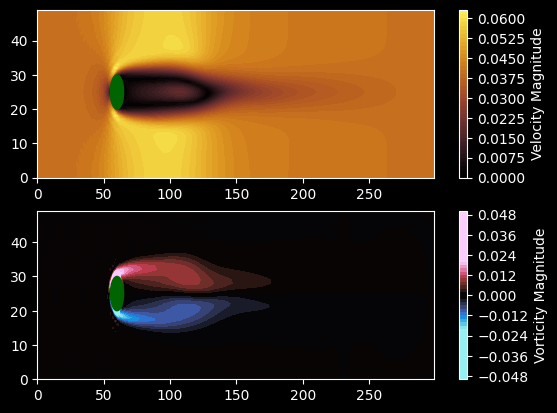

 98%|█████████▊| 5891/6000 [00:31<00:07, 15.31it/s]

[[0.03981365 0.03989    0.03988698 ... 0.03990299 0.03988303 0.03979697]
 [0.0398076  0.03999065 0.04006742 ... 0.04000462 0.04003692 0.03985946]
 [0.03985453 0.03994523 0.04005153 ... 0.04000155 0.03998669 0.03991007]
 ...
 [0.04010352 0.04010311 0.04010194 ... 0.0401     0.04010192 0.0401031 ]
 [0.0401016  0.04010121 0.04010005 ... 0.04009812 0.04010005 0.04010121]
 [0.03982659 0.03989375 0.03991527 ... 0.0399181  0.03989423 0.03981903]]


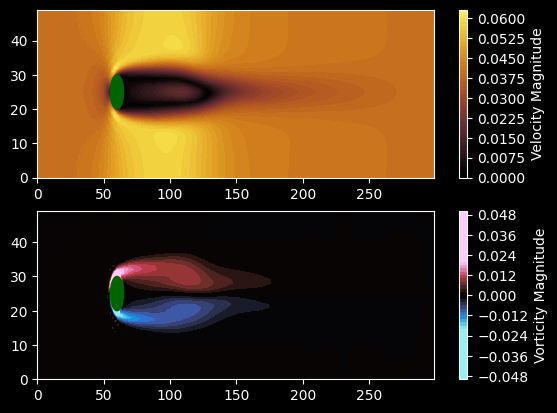

 98%|█████████▊| 5901/6000 [00:31<00:06, 15.09it/s]

[[0.03988577 0.03993578 0.03992638 ... 0.03993686 0.03992446 0.0398678 ]
 [0.03986301 0.04000936 0.04007111 ... 0.04000761 0.04005355 0.03991305]
 [0.0398923  0.03998239 0.04007123 ... 0.0400195  0.04002323 0.03994753]
 ...
 [0.04010637 0.04010593 0.04010458 ... 0.04010198 0.04010433 0.04010581]
 [0.04010575 0.04010534 0.040104   ... 0.04010138 0.04010376 0.04010522]
 [0.03988613 0.03993312 0.03994868 ... 0.03994636 0.03993253 0.03988037]]


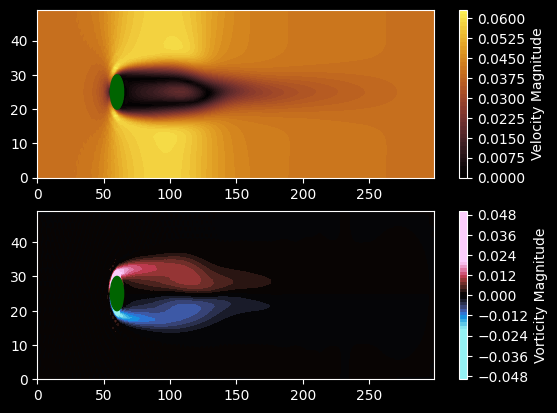

 99%|█████████▊| 5911/6000 [00:32<00:05, 15.10it/s]

[[0.03994877 0.03996383 0.03995217 ... 0.0399581  0.0399494  0.0399272 ]
 [0.03990326 0.04001418 0.04006196 ... 0.03999919 0.04005589 0.03995051]
 [0.03991414 0.04000593 0.04007373 ... 0.0400219  0.04004429 0.03997018]
 ...
 [0.04010097 0.04010049 0.04009911 ... 0.04009683 0.04009908 0.04010047]
 [0.04009971 0.04009925 0.04009787 ... 0.04009547 0.0400978  0.04009922]
 [0.03994431 0.03996967 0.03997491 ... 0.03996764 0.03996698 0.03993954]]


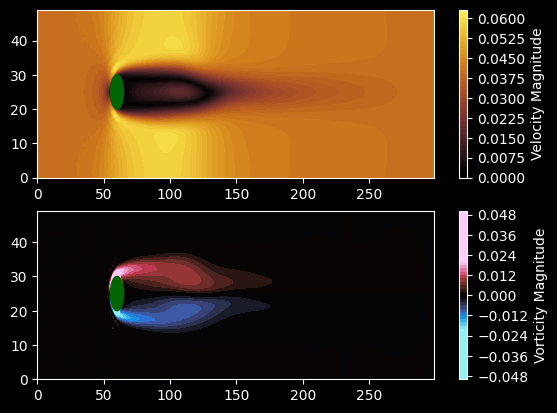

 99%|█████████▊| 5921/6000 [00:33<00:05, 14.97it/s]

[[0.03994385 0.03995178 0.03994441 ... 0.03995261 0.03993893 0.03992105]
 [0.03989082 0.04000045 0.04004874 ... 0.03998725 0.04004131 0.03993672]
 [0.03990391 0.03999645 0.0400597  ... 0.04000913 0.04003363 0.03996054]
 ...
 [0.04010399 0.04010353 0.04010234 ... 0.04010086 0.04010261 0.04010367]
 [0.04010167 0.04010122 0.04010001 ... 0.04009844 0.04010028 0.04010135]
 [0.03994892 0.03997265 0.03997654 ... 0.03997022 0.0399711  0.0399453 ]]


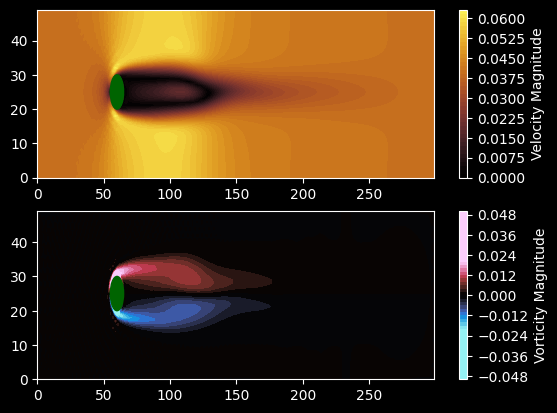

 99%|█████████▉| 5931/6000 [00:33<00:04, 14.94it/s]

[[0.03989936 0.03992579 0.03992216 ... 0.03993595 0.03991623 0.03987748]
 [0.03985114 0.03998147 0.04003932 ... 0.039979   0.0400216  0.03989572]
 [0.03987711 0.03996842 0.04004073 ... 0.03999164 0.04000491 0.03993317]
 ...
 [0.04011443 0.04011396 0.04011283 ... 0.04011157 0.04011319 0.04011415]
 [0.0401125  0.04011206 0.04011092 ... 0.04010962 0.04011129 0.04011224]
 [0.03991635 0.03995405 0.03996479 ... 0.03996214 0.03995637 0.03991569]]


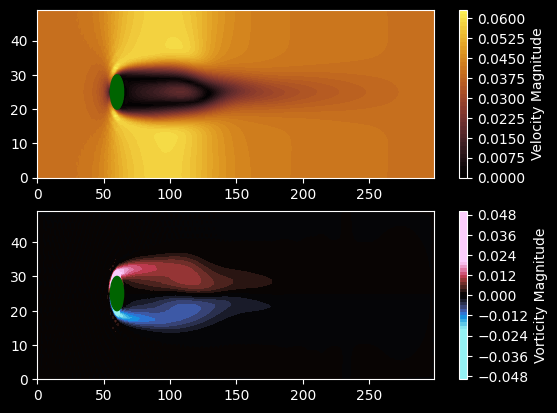

 99%|█████████▉| 5941/6000 [00:34<00:04, 13.49it/s]

[[0.0398703  0.03991309 0.03990819 ... 0.03992377 0.03990427 0.03984834]
 [0.03982557 0.03997025 0.04003431 ... 0.03997355 0.04000854 0.03986824]
 [0.0398537  0.0399434  0.04002311 ... 0.03997384 0.03997743 0.03990865]
 ...
 [0.04012005 0.04011959 0.04011833 ... 0.0401163  0.04011835 0.04011961]
 [0.04011903 0.04011859 0.04011733 ... 0.04011537 0.04011741 0.04011864]
 [0.03989154 0.03994026 0.03995595 ... 0.03995459 0.03994451 0.03989312]]


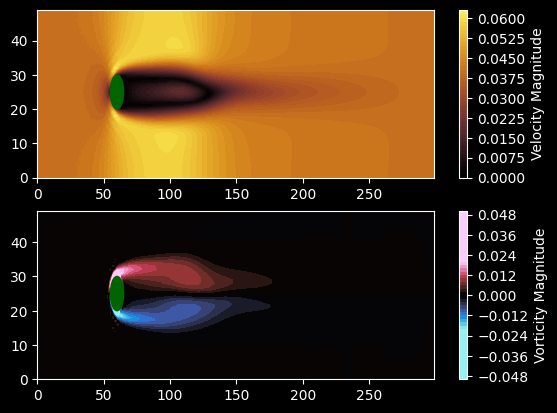

 99%|█████████▉| 5951/6000 [00:35<00:03, 13.82it/s]

[[0.03985551 0.03990517 0.03989862 ... 0.03991141 0.03989477 0.03983218]
 [0.03981592 0.03996838 0.04003558 ... 0.03997423 0.04000636 0.03985824]
 [0.03984239 0.03993177 0.04001575 ... 0.03996627 0.03996379 0.0398972 ]
 ...
 [0.04011855 0.0401182  0.04011692 ... 0.04011397 0.04011638 0.04011792]
 [0.04011716 0.04011682 0.04011553 ... 0.04011257 0.04011502 0.04011656]
 [0.03987639 0.03993    0.03994533 ... 0.03994197 0.03993159 0.03987628]]


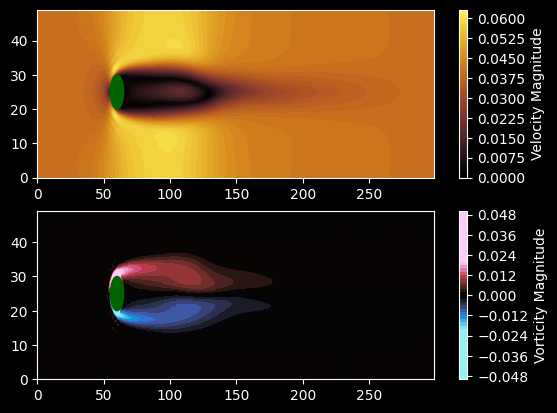

 99%|█████████▉| 5961/6000 [00:36<00:02, 13.98it/s]

[[0.03983488 0.03989364 0.03988936 ... 0.0399019  0.03988416 0.0398125 ]
 [0.03980888 0.03997347 0.04004588 ... 0.03998436 0.04001487 0.03985482]
 [0.03984301 0.03993182 0.04002373 ... 0.03997476 0.03996591 0.03989862]
 ...
 [0.04012309 0.04012273 0.04012153 ... 0.0401189  0.04012112 0.04012253]
 [0.04012051 0.04012018 0.04011898 ... 0.04011624 0.04011853 0.04011996]
 [0.03985572 0.03991469 0.03993052 ... 0.03992838 0.03991316 0.03985064]]


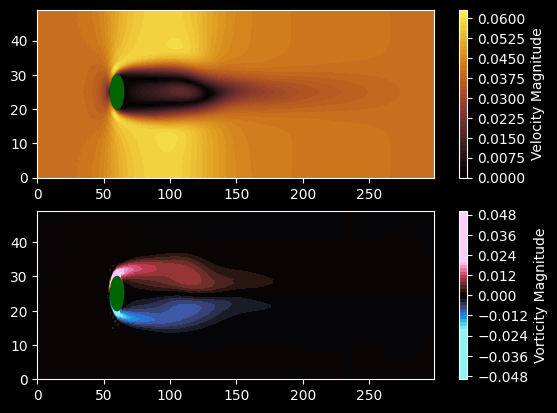

100%|█████████▉| 5971/6000 [00:36<00:02, 14.11it/s]

[[0.03983095 0.03989633 0.03989317 ... 0.03990894 0.03988951 0.03981255]
 [0.03981772 0.03998646 0.04006081 ... 0.03999889 0.04003209 0.03986845]
 [0.03985783 0.03994421 0.040042   ... 0.03999307 0.0399837  0.03991376]
 ...
 [0.0401338  0.04013333 0.04013197 ... 0.04012973 0.04013196 0.04013332]
 [0.04013176 0.04013131 0.04012996 ... 0.04012767 0.04012994 0.0401313 ]
 [0.0398469  0.0399072  0.03992553 ... 0.03992758 0.03990648 0.03983896]]


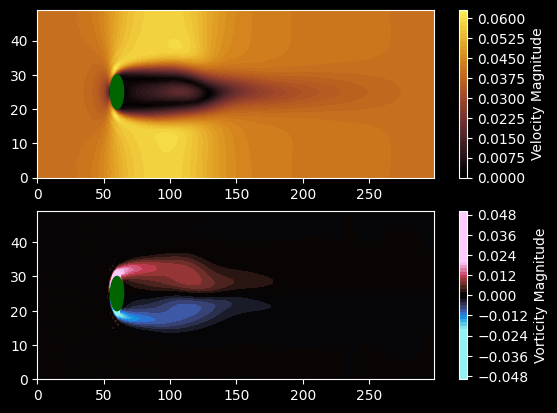

100%|█████████▉| 5981/6000 [00:37<00:01, 14.31it/s]

[[0.0398736  0.03992624 0.0399194  ... 0.03993337 0.03991766 0.03985685]
 [0.03985705 0.04000513 0.04007086 ... 0.04000765 0.04005105 0.03990874]
 [0.03988787 0.03997227 0.04006221 ... 0.04001151 0.0400142  0.03994336]
 ...
 [0.04013674 0.04013621 0.0401347  ... 0.04013218 0.04013467 0.0401362 ]
 [0.04013573 0.04013522 0.0401337  ... 0.04013116 0.0401337  0.04013522]
 [0.03987771 0.0399264  0.03994269 ... 0.03994379 0.03992643 0.03987051]]


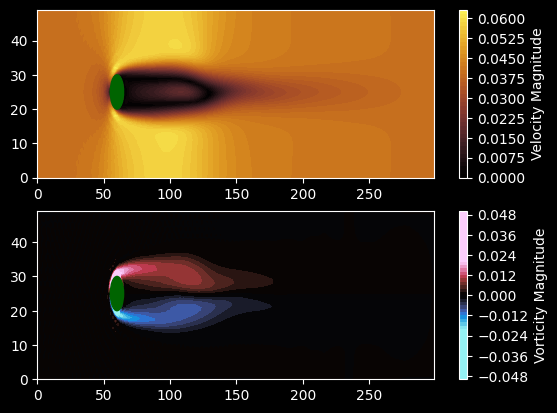

100%|██████████| 6000/6000 [00:38<00:00, 156.61it/s]


<Figure size 640x480 with 0 Axes>

In [ ]:
r"""
Solves the incompressible Navier Stokes equations using the Lattice-Boltzmann
Method¹. The scenario is the flow around a cylinder in 2D which yields a van
Karman vortex street.


                                periodic
        +-------------------------------------------------------------+
        |                                                             |
        | --->                                                        |
        |                                                             |
        | --->           ****                                         |
        |              ********                                       |
inflow  | --->        **********                                      |  outflow
        |              ********                                       |
        | --->           ****                                         |
        |                                                             |
        | --->                                                        |
        |                                                             |
        +-------------------------------------------------------------+
                                periodic

-> uniform inflow profile with only horizontal velocities at left boundary
-> outflow boundary at the right
-> top and bottom boundary connected by periodicity
-> the circle in the center (representing a slice from the 3d cylinder)
   uses a no-slip Boundary Condition
-> initially, fluid is NOT at rest and has the horizontal velocity profile
   all over the domain

¹ To be fully correct, LBM considers the compressible Navier-Stokes Equations.
This can also be seen by the fact that we have a changing macroscopic density over
the domain and that we actively use it throughout the computations. However, our
flow speeds are below the 0.3 Mach limit which results in only minor density
fluctuations. Hence, the fluid behaves almost incompressible.

------

Solution strategy:

Discretize the domain into a Cartesian mesh. Each grid vertex is associated
with 9 discrete velocities (D2Q9) and 2 macroscopic velocities. Then iterate
over time.


1. Apply outflow boundary condition on the right boundary

2. Compute Macroscopic Quantities (density and velocities)

3. Apply Inflow Profile by Zou/He Dirichlet Boundary Condition
   on the left boundary

4. Compute the discrete equilibria velocities

5. Perform a Collision step according to BGK (Bhatnagar–Gross–Krook)

6. Apply Bounce-Back Boundary Conditions on the cylinder obstacle

7. Stream alongside the lattice velocities

8. Advance in time (repeat the loop)


The 7th step implicitly yields the periodic Boundary Conditions at
the top and bottom boundary.

------

Employed Discretization:

D2Q9 grid, i.e. 2-dim space with 9 discrete
velocities per node. In Other words the 2d space is discretized into
N_x by N_y by 9 points.

    6   2   5
      \ | /
    3 - 0 - 1
      / | \
    7   4   8

Therefore we have the shapes:

- macroscopic velocity : (N_x, N_y, 2)
- discrete velocity    : (N_x, N_y, 9)
- density              : (N_x, N_y)


------

Lattice Boltzmann Computations

Density:

ρ = ∑ᵢ fᵢ


Velocities:

u = 1/ρ ∑ᵢ fᵢ cᵢ


Equilibrium:

fᵢᵉ = ρ Wᵢ (1 + 3 cᵢ ⋅ u + 9/2 (cᵢ ⋅ u)² − 3/2 ||u||₂²)


BGK Collision:

fᵢ ← fᵢ − ω (fᵢ − fᵢᵉ)


with the following quantities:

fᵢ  : Discrete velocities
fᵢᵉ : Equilibrium discrete velocities
ρ   : Density
∑ᵢ  : Summation over all discrete velocities
cᵢ  : Lattice Velocities
Wᵢ  : Lattice Weights
ω   : Relaxation factor

------

The flow configuration is defined using the Reynolds Number

Re = (U R) / ν

with:

Re : Reynolds Number
U  : Inflow Velocity
R  : Cylinder Radius
ν  : Kinematic Viscosity

Can be re-arranged in terms of the kinematic viscosity

ν = (U R) / Re

Then the relaxation factor is computed according to

ω = 1 / (3 ν + 0.5)

------

Note that this scheme can become unstable for Reynoldsnumbers >~ 350 ²

² Note that the stability of the D2Q9 scheme is mathematically not
linked to the Reynoldsnumber. Just use this as a reference. Stability
for this scheme is realted to the velocity magnitude.
Consequentially, the actual limiting factor is the Mach number (the
ratio between velocity magnitude and the speed of sound).

"""
N_ITERATIONS = 6000
REYNOLDS_NUMBER = 80

N_POINTS_X = 300
N_POINTS_Y = 50

CYLINDER_CENTER_INDEX_X = N_POINTS_X // 5
CYLINDER_CENTER_INDEX_Y = N_POINTS_Y // 2
CYLINDER_RADIUS_INDICES = N_POINTS_Y // 9

MAX_HORIZONTAL_INFLOW_VELOCITY = 0.04

VISUALIZE = True
PLOT_EVERY_N_STEPS = 10
SKIP_FIRST_N_ITERATIONS = 5800


r"""
LBM Grid: D2Q9
    6   2   5
      \ | /
    3 - 0 - 1
      / | \
    7   4   8
"""

N_DISCRETE_VELOCITIES = 9

LATTICE_VELOCITIES = jnp.array([
    [ 0,  1,  0, -1,  0,  1, -1, -1,  1,],
    [ 0,  0,  1,  0, -1,  1,  1, -1, -1,]
])

LATTICE_INDICES = jnp.array([
    0, 1, 2, 3, 4, 5, 6, 7, 8,
])

OPPOSITE_LATTICE_INDICES = jnp.array([
    0, 3, 4, 1, 2, 7, 8, 5, 6,
])

LATTICE_WEIGHTS = jnp.array([
    4/9,                        # Center Velocity [0,]
    1/9,  1/9,  1/9,  1/9,      # Axis-Aligned Velocities [1, 2, 3, 4]
    1/36, 1/36, 1/36, 1/36,     # 45 ° Velocities [5, 6, 7, 8]
])

RIGHT_VELOCITIES = jnp.array([1, 5, 8])
UP_VELOCITIES = jnp.array([2, 5, 6])
LEFT_VELOCITIES = jnp.array([3, 6, 7])
DOWN_VELOCITIES = jnp.array([4, 7, 8])
PURE_VERTICAL_VELOCITIES = jnp.array([0, 2, 4])
PURE_HORIZONTAL_VELOCITIES = jnp.array([0, 1, 3])


def get_density(discrete_velocities):
    density = jnp.sum(discrete_velocities, axis=-1)

    return density

def get_macroscopic_velocities(discrete_velocities, density):
    macroscopic_velocities = jnp.einsum(
        "NMQ,dQ->NMd",
        discrete_velocities,
        LATTICE_VELOCITIES,
    ) / density[..., jnp.newaxis]

    return macroscopic_velocities

def get_equilibrium_discrete_velocities(macroscopic_velocities, density):
    projected_discrete_velocities = jnp.einsum(
        "dQ,NMd->NMQ",
        LATTICE_VELOCITIES,
        macroscopic_velocities,
    )
    macroscopic_velocity_magnitude = jnp.linalg.norm(
        macroscopic_velocities,
        axis=-1,
        ord=2,
    )
    equilibrium_discrete_velocities = (
        density[..., jnp.newaxis]
        *
        LATTICE_WEIGHTS[jnp.newaxis, jnp.newaxis, :]
        *
        (
            1
            +
            3 * projected_discrete_velocities
            +
            9/2 * projected_discrete_velocities**2
            -
            3/2 * macroscopic_velocity_magnitude[..., jnp.newaxis]**2
        )
    )

    return equilibrium_discrete_velocities

def main():
    jax.config.update("jax_enable_x64", True)

    kinematic_viscosity = (
        (
            MAX_HORIZONTAL_INFLOW_VELOCITY
            *
            CYLINDER_RADIUS_INDICES
        ) / (
            REYNOLDS_NUMBER
        )
    )
    relaxation_omega = (
        (
            1.0
        ) / (
            3.0
            *
            kinematic_viscosity
            +
            0.5
        )
    )

    # Define a mesh
    x = jnp.arange(N_POINTS_X)
    y = jnp.arange(N_POINTS_Y)
    X, Y = jnp.meshgrid(x, y, indexing="ij")

    # Obstacle Mask: An array of the shape like X or Y, but contains True if the
    # point belongs to the obstacle and False if not
    obstacle_mask = (
        jnp.sqrt(
            (
                X
                -
                CYLINDER_CENTER_INDEX_X
            )**2
            +
            (
                Y
                -
                CYLINDER_CENTER_INDEX_Y
            )**2
        )
        <
            CYLINDER_RADIUS_INDICES
    )

    velocity_profile = jnp.zeros((N_POINTS_X, N_POINTS_Y, 2))
    velocity_profile = velocity_profile.at[:, :, 0].set(MAX_HORIZONTAL_INFLOW_VELOCITY)

    @jax.jit
    def update(discrete_velocities_prev):
        # (1) Prescribe the outflow BC on the right boundary,
        # Cette ligne applique une condition limite de type "gradient nul" sur le bord droit du domaine. Elle permet au fluide de "sortir" naturellement de la zone simulée sans créer de perturbations artificielles.

        discrete_velocities_prev = discrete_velocities_prev.at[-1, :, LEFT_VELOCITIES].set(
            discrete_velocities_prev[-2, :, LEFT_VELOCITIES]
        )

        # (2) Macroscopic Velocities
        # Ici, on calcule la densité (`density_prev`) et les vitesses macroscopiques (`macroscopic_velocities_prev`) du fluide en chaque point du domaine. Ces grandeurs sont déduites de la distribution des vitesses discrètes des particules.

        density_prev = get_density(discrete_velocities_prev)
        macroscopic_velocities_prev = get_macroscopic_velocities(
            discrete_velocities_prev,
            density_prev,
        )

        # (3) Prescribe Inflow Dirichlet BC using Zou/He scheme
        #Ces lignes appliquent une condition limite d'entrée sur le bord gauche du domaine, en utilisant le schéma de Zou/He.  Cela permet d'imposer un profil de vitesse d'entrée au fluide (ici, un profil uniforme horizontal défini par `velocity_profile`).

        macroscopic_velocities_prev =\
            macroscopic_velocities_prev.at[0, 1:-1, :].set(
                velocity_profile[0, 1:-1, :]
            )
        density_prev = density_prev.at[0, :].set(
            (
                get_density(discrete_velocities_prev[0, :, PURE_VERTICAL_VELOCITIES].T)
                +
                2 *
                get_density(discrete_velocities_prev[0, :, LEFT_VELOCITIES].T)
            ) / (
                1 - macroscopic_velocities_prev[0, :, 0]
            )
        )

        # (4) Compute discrete Equilibria velocities
        # Cette étape calcule les vitesses discrètes d'équilibre (`equilibrium_discrete_velocities`) pour chaque point du domaine. Ces vitesses représentent l'état vers lequel le fluide tend naturellement en l'absence de perturbations.

        equilibrium_discrete_velocities = get_equilibrium_discrete_velocities(
            macroscopic_velocities_prev,
            density_prev,
        )

        # (3) Belongs to the Zou/He scheme
        discrete_velocities_prev = \
            discrete_velocities_prev.at[0, :, RIGHT_VELOCITIES].set(
                equilibrium_discrete_velocities[0, :, RIGHT_VELOCITIES]
            )

        # (5) Collide according to BGK
        # Ici, on simule les collisions entre les particules du fluide en utilisant l'opérateur de collision BGK (Bhatnagar–Gross–Krook). Cet opérateur permet de redistribuer les vitesses discrètes des particules en fonction de leur écart par rapport aux vitesses d'équilibre.

        discrete_velocities_post_collision = (
            discrete_velocities_prev
            -
            relaxation_omega
            *
            (
                discrete_velocities_prev
                -
                equilibrium_discrete_velocities
            )
        )

        # (6) Bounce-Back Boundary Conditions to enfore the no-slip
        # Ces lignes appliquent une condition limite de type "rebond" (bounce-back) sur les points du domaine qui représentent l'obstacle (le cylindre). Cela simule l'effet de non-glissement du fluide sur la surface de l'obstacle.

        for i in range(N_DISCRETE_VELOCITIES):
            discrete_velocities_post_collision =\
                discrete_velocities_post_collision.at[obstacle_mask, LATTICE_INDICES[i]].set(
                    discrete_velocities_prev[obstacle_mask, OPPOSITE_LATTICE_INDICES[i]]
                )

        # (7) Stream alongside lattice velocities
        # Cette étape simule la propagation des particules du fluide sur la grille. Chaque particule se déplace d'une case dans la direction correspondant à sa vitesse discrète.

        discrete_velocities_streamed = discrete_velocities_post_collision
        for i in range(N_DISCRETE_VELOCITIES):
            discrete_velocities_streamed = discrete_velocities_streamed.at[:, :, i].set(
                jnp.roll(
                    jnp.roll(
                        discrete_velocities_post_collision[:, :, i],
                        LATTICE_VELOCITIES[0, i],
                        axis=0,
                    ),
                    LATTICE_VELOCITIES[1, i],
                    axis=1,
                )
            )

        return discrete_velocities_streamed


    discrete_velocities_prev = get_equilibrium_discrete_velocities(
        velocity_profile,
        jnp.ones((N_POINTS_X, N_POINTS_Y)),
    )

    plt.style.use("dark_background")
    plt.figure(figsize=(15, 6), dpi=100)

    for iteration_index in tqdm(range(N_ITERATIONS)):
        discrete_velocities_next = update(discrete_velocities_prev)

        discrete_velocities_prev = discrete_velocities_next

        if iteration_index % PLOT_EVERY_N_STEPS == 0 and VISUALIZE and iteration_index > SKIP_FIRST_N_ITERATIONS:
            density = get_density(discrete_velocities_next)
            macroscopic_velocities = get_macroscopic_velocities(
                discrete_velocities_next,
                density,
            )
            velocity_magnitude = jnp.linalg.norm(
                macroscopic_velocities,
                axis=-1,
                ord=2,
            )
            d_u__d_x, d_u__d_y = jnp.gradient(macroscopic_velocities[..., 0])
            d_v__d_x, d_v__d_y = jnp.gradient(macroscopic_velocities[..., 1])
            curl = (d_u__d_y - d_v__d_x)

            print(velocity_magnitude)
            # Velocity Magnitude Contour Plot in the top
            plt.subplot(211)
            plt.contourf(
                X,
                Y,
                velocity_magnitude,
                levels=50,
                cmap=cmr.amber,
            )
            plt.colorbar().set_label("Velocity Magnitude")
            plt.gca().add_patch(plt.Circle(
                (CYLINDER_CENTER_INDEX_X, CYLINDER_CENTER_INDEX_Y),
                CYLINDER_RADIUS_INDICES,
                color="darkgreen",
            ))

            # Vorticity Magnitude Contour PLot in the bottom
            plt.subplot(212)
            plt.contourf(
                X,
                Y,
                curl,
                levels=50,
                cmap=cmr.redshift,
                vmin=-0.02,
                vmax= 0.02,
            )
            plt.colorbar().set_label("Vorticity Magnitude")
            plt.gca().add_patch(plt.Circle(
                (CYLINDER_CENTER_INDEX_X, CYLINDER_CENTER_INDEX_Y),
                CYLINDER_RADIUS_INDICES,
                color="darkgreen",
            ))

            plt.draw()
            plt.pause(0.0001)
            plt.clf()

    if VISUALIZE:
        plt.show()



if __name__ == "__main__":
    main()

#### Enregistement des data dans un npz

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import cmasher as cmr
from tqdm import tqdm
import numpy as np  # Import numpy for saving npz files

N_ITERATIONS = 15_000
REYNOLDS_NUMBER = 80

N_POINTS_X = 300
N_POINTS_Y = 50

CYLINDER_CENTER_INDEX_X = N_POINTS_X // 5
CYLINDER_CENTER_INDEX_Y = N_POINTS_Y // 2
CYLINDER_RADIUS_INDICES = N_POINTS_Y // 9

MAX_HORIZONTAL_INFLOW_VELOCITY = 0.04

VISUALIZE = True
PLOT_EVERY_N_STEPS = 100
SKIP_FIRST_N_ITERATIONS = 5000

N_DISCRETE_VELOCITIES = 9

LATTICE_VELOCITIES = jnp.array([
    [ 0,  1,  0, -1,  0,  1, -1, -1,  1,],
    [ 0,  0,  1,  0, -1,  1,  1, -1, -1,]
])

LATTICE_INDICES = jnp.array([
    0, 1, 2, 3, 4, 5, 6, 7, 8,
])

OPPOSITE_LATTICE_INDICES = jnp.array([
    0, 3, 4, 1, 2, 7, 8, 5, 6,
])

LATTICE_WEIGHTS = jnp.array([
    4/9,                        # Center Velocity [0,]
    1/9,  1/9,  1/9,  1/9,      # Axis-Aligned Velocities [1, 2, 3, 4]
    1/36, 1/36, 1/36, 1/36,     # 45 ° Velocities [5, 6, 7, 8]
])

RIGHT_VELOCITIES = jnp.array([1, 5, 8])
UP_VELOCITIES = jnp.array([2, 5, 6])
LEFT_VELOCITIES = jnp.array([3, 6, 7])
DOWN_VELOCITIES = jnp.array([4, 7, 8])
PURE_VERTICAL_VELOCITIES = jnp.array([0, 2, 4])
PURE_HORIZONTAL_VELOCITIES = jnp.array([0, 1, 3])


def get_density(discrete_velocities):
    density = jnp.sum(discrete_velocities, axis=-1)
    return density

def get_macroscopic_velocities(discrete_velocities, density):
    macroscopic_velocities = jnp.einsum(
        "NMQ,dQ->NMd",
        discrete_velocities,
        LATTICE_VELOCITIES,
    ) / density[..., jnp.newaxis]
    return macroscopic_velocities

def get_equilibrium_discrete_velocities(macroscopic_velocities, density):
    projected_discrete_velocities = jnp.einsum(
        "dQ,NMd->NMQ",
        LATTICE_VELOCITIES,
        macroscopic_velocities,
    )
    macroscopic_velocity_magnitude = jnp.linalg.norm(
        macroscopic_velocities,
        axis=-1,
        ord=2,
    )
    equilibrium_discrete_velocities = (
        density[..., jnp.newaxis]
        *
        LATTICE_WEIGHTS[jnp.newaxis, jnp.newaxis, :]
        *
        (
            1
            +
            3 * projected_discrete_velocities
            +
            9/2 * projected_discrete_velocities**2
            -
            3/2 * macroscopic_velocity_magnitude[..., jnp.newaxis]**2
        )
    )
    return equilibrium_discrete_velocities


def main():
    jax.config.update("jax_enable_x64", True)

    kinematic_viscosity = (
        (
            MAX_HORIZONTAL_INFLOW_VELOCITY
            *
            CYLINDER_RADIUS_INDICES
        ) / (
            REYNOLDS_NUMBER
        )
    )
    relaxation_omega = (
        (
            1.0
        ) / (
            3.0
            *
            kinematic_viscosity
            +
            0.5
        )
    )

    # Define a mesh
    x = jnp.arange(N_POINTS_X)
    y = jnp.arange(N_POINTS_Y)
    X, Y = jnp.meshgrid(x, y, indexing="ij")

    # Obstacle Mask
    obstacle_mask = (
        jnp.sqrt(
            (
                X
                - CYLINDER_CENTER_INDEX_X
            )**2
            +
            (
                Y
                - CYLINDER_CENTER_INDEX_Y
            )**2
        )
        <
            CYLINDER_RADIUS_INDICES
    )

    velocity_profile = jnp.zeros((N_POINTS_X, N_POINTS_Y, 2))
    velocity_profile = velocity_profile.at[:, :, 0].set(MAX_HORIZONTAL_INFLOW_VELOCITY)

    @jax.jit
    def update(discrete_velocities_prev):
        # (1) Prescribe the outflow BC on the right boundary
        discrete_velocities_prev = discrete_velocities_prev.at[-1, :, LEFT_VELOCITIES].set(
            discrete_velocities_prev[-2, :, LEFT_VELOCITIES]
        )

        # (2) Macroscopic Velocities
        density_prev = get_density(discrete_velocities_prev)
        macroscopic_velocities_prev = get_macroscopic_velocities(
            discrete_velocities_prev,
            density_prev,
        )

        # (3) Prescribe Inflow Dirichlet BC using Zou/He scheme
        macroscopic_velocities_prev =\
            macroscopic_velocities_prev.at[0, 1:-1, :].set(
                velocity_profile[0, 1:-1, :]
            )
        density_prev = density_prev.at[0, :].set(
            (
                get_density(discrete_velocities_prev[0, :, PURE_VERTICAL_VELOCITIES].T)
                +
                2 *
                get_density(discrete_velocities_prev[0, :, LEFT_VELOCITIES].T)
            ) / (
                1 - macroscopic_velocities_prev[0, :, 0]
            )
        )

        # (4) Compute discrete Equilibria velocities
        equilibrium_discrete_velocities = get_equilibrium_discrete_velocities(
            macroscopic_velocities_prev,
            density_prev,
        )

        # (3) Belongs to the Zou/He scheme
        discrete_velocities_prev = \
            discrete_velocities_prev.at[0, :, RIGHT_VELOCITIES].set(
                equilibrium_discrete_velocities[0, :, RIGHT_VELOCITIES]
            )

        # (5) Collide according to BGK
        discrete_velocities_post_collision = (
            discrete_velocities_prev
            - relaxation_omega
            *
            (
                discrete_velocities_prev
                - equilibrium_discrete_velocities
            )
        )

        # (6) Bounce-Back Boundary Conditions to enfore the no-slip
        for i in range(N_DISCRETE_VELOCITIES):
            discrete_velocities_post_collision =\
                discrete_velocities_post_collision.at[obstacle_mask, LATTICE_INDICES[i]].set(
                    discrete_velocities_prev[obstacle_mask, OPPOSITE_LATTICE_INDICES[i]]
                )

        # (7) Stream alongside lattice velocities
        discrete_velocities_streamed = discrete_velocities_post_collision
        for i in range(N_DISCRETE_VELOCITIES):
            discrete_velocities_streamed = discrete_velocities_streamed.at[:, :, i].set(
                jnp.roll(
                    jnp.roll(
                        discrete_velocities_post_collision[:, :, i],
                        LATTICE_VELOCITIES[0, i],
                        axis=0,
                    ),
                    LATTICE_VELOCITIES[1, i],
                    axis=1,
                )
            )

        return discrete_velocities_streamed


    discrete_velocities_prev = get_equilibrium_discrete_velocities(
        velocity_profile,
        jnp.ones((N_POINTS_X, N_POINTS_Y)),
    )

    plt.style.use("dark_background")
    plt.figure(figsize=(15, 6), dpi=100)

    # Initialize a list to store velocity magnitudes
    velocity_magnitudes = []

    for iteration_index in tqdm(range(N_ITERATIONS)):
        discrete_velocities_next = update(discrete_velocities_prev)

        discrete_velocities_prev = discrete_velocities_next

        if iteration_index % PLOT_EVERY_N_STEPS == 0 and VISUALIZE and iteration_index > SKIP_FIRST_N_ITERATIONS:
            density = get_density(discrete_velocities_next)
            macroscopic_velocities = get_macroscopic_velocities(
                discrete_velocities_next,
                density,
            )
            velocity_magnitude = jnp.linalg.norm(
                macroscopic_velocities,
                axis=-1,
                ord=2,
            )

            # Append the current velocity magnitude to the list
            velocity_magnitudes.append(velocity_magnitude)

            # Plotting (optional)
#            plt.imshow(velocity_magnitude.T, cmap=cmr.ember, origin="lower")
#            plt.colorbar()
#            plt.pause(0.1)

    # Save all velocity magnitudes to a single npz file
    velocity_magnitudes_array = jnp.array(velocity_magnitudes)
    np.savez("velocity_magnitudes_data.npz", velocity_magnitudes=velocity_magnitudes_array)

    print("Simulation complete.")

if __name__ == "__main__":
    main()


100%|██████████| 15000/15000 [00:55<00:00, 269.99it/s]


Simulation complete.


<Figure size 1500x600 with 0 Axes>

In [ ]:
# Load the data
loaded_data = np.load("velocity_magnitudes_data.npz")

# Access the velocity magnitudes stored in the file
velocity_magnitudes = loaded_data["velocity_magnitudes"]

# Print the shape of the data to check
print(velocity_magnitudes.shape)


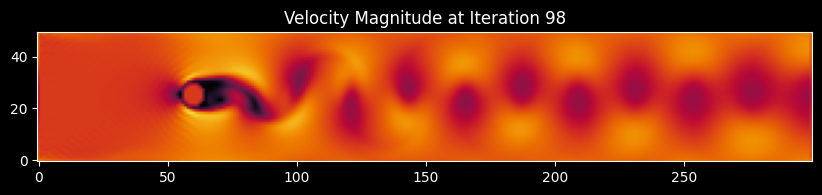

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr

# Load the saved npz file
loaded_data = np.load("velocity_magnitudes_data.npz")

# Access the velocity magnitudes stored in the file
velocity_magnitudes = loaded_data["velocity_magnitudes"]

# Specify the iteration to plot (e.g., 20th iteration)
iteration_index = 98

# Check if the iteration index is within the available range
if iteration_index < velocity_magnitudes.shape[0]:
    velocity_magnitude_at_iteration = velocity_magnitudes[iteration_index]

    # Plot the velocity magnitude at the specified iteration
    plt.figure(figsize=(10, 6))
    plt.imshow(velocity_magnitude_at_iteration.T, cmap=cmr.ember, origin="lower")
    #plt.colorbar(label="Velocity Magnitude")
    plt.title(f"Velocity Magnitude at Iteration {iteration_index}")
    plt.show()
else:
    print(f"Iteration {iteration_index} is out of bounds. Total iterations: {velocity_magnitudes.shape[0]}")


#### Enregistrement de la data dans des fichiers Npz


In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import cmasher as cmr
from tqdm import tqdm
import numpy as np  # Import numpy for saving npz files

N_ITERATIONS = 10_000

# REYNOLD DATA SELECTION
startRe = 70
stopRe = 90
numRe = 5
REYNOLDS = np.linspace(startRe, stopRe, num=numRe)
print(REYNOLDS)

# Inflow velocities
startv = 0.0001
stopv = 0.008
numv = 5
MAX_HORIZONTAL_INFLOW_VELOCITY = [0.004]

# Mesh and parameters
N_POINTS_X = 300
N_POINTS_Y = 50
CYLINDER_CENTER_INDEX_X = N_POINTS_X // 5
CYLINDER_CENTER_INDEX_Y = N_POINTS_Y // 2
CYLINDER_RADIUS_INDICES = N_POINTS_Y // 9

VISUALIZE = True
PLOT_EVERY_N_STEPS = 100
SKIP_FIRST_N_ITERATIONS = 5000

N_DISCRETE_VELOCITIES = 9

# Lattice parameters
LATTICE_VELOCITIES = jnp.array([ [0, 1, 0, -1, 0, 1, -1, -1, 1],
                                [0, 0, 1, 0, -1, 1, 1, -1, -1] ])
LATTICE_INDICES = jnp.array([ 0, 1, 2, 3, 4, 5, 6, 7, 8 ])
OPPOSITE_LATTICE_INDICES = jnp.array([ 0, 3, 4, 1, 2, 7, 8, 5, 6 ])
LATTICE_WEIGHTS = jnp.array([ 4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36 ])

# Boundary conditions
RIGHT_VELOCITIES = jnp.array([1, 5, 8])
UP_VELOCITIES = jnp.array([2, 5, 6])
LEFT_VELOCITIES = jnp.array([3, 6, 7])
DOWN_VELOCITIES = jnp.array([4, 7, 8])
PURE_VERTICAL_VELOCITIES = jnp.array([0, 2, 4])
PURE_HORIZONTAL_VELOCITIES = jnp.array([0, 1, 3])

def get_density(discrete_velocities):
    density = jnp.sum(discrete_velocities, axis=-1)
    return density

def get_macroscopic_velocities(discrete_velocities, density):
    macroscopic_velocities = jnp.einsum(
        "NMQ,dQ->NMd",
        discrete_velocities,
        LATTICE_VELOCITIES,
    ) / density[..., jnp.newaxis]
    return macroscopic_velocities

def get_equilibrium_discrete_velocities(macroscopic_velocities, density):
    projected_discrete_velocities = jnp.einsum(
        "dQ,NMd->NMQ",
        LATTICE_VELOCITIES,
        macroscopic_velocities,
    )
    macroscopic_velocity_magnitude = jnp.linalg.norm(
        macroscopic_velocities,
        axis=-1,
        ord=2,
    )
    equilibrium_discrete_velocities = (
        density[..., jnp.newaxis]
        *
        LATTICE_WEIGHTS[jnp.newaxis, jnp.newaxis, :]
        *
        (
            1
            +
            3 * projected_discrete_velocities
            +
            9/2 * projected_discrete_velocities**2
            -
            3/2 * macroscopic_velocity_magnitude[..., jnp.newaxis]**2
        )
    )
    return equilibrium_discrete_velocities






def main():
    jax.config.update("jax_enable_x64", True)

    for REYNOLDS_NUMBER in REYNOLDS:
        for velocity in MAX_HORIZONTAL_INFLOW_VELOCITY:
            print(f"Running simulation for Re = {REYNOLDS_NUMBER}, velocity = {velocity}")

            # Re-initialize or compute required variables
            kinematic_viscosity = (velocity * CYLINDER_RADIUS_INDICES) / REYNOLDS_NUMBER
            relaxation_omega = 1.0 / (3.0 * kinematic_viscosity + 0.5)

            velocity_profile = jnp.zeros((N_POINTS_X, N_POINTS_Y, 2))
            velocity_profile = velocity_profile.at[:, :, 0].set(velocity)

            # Initialize the mesh and obstacle mask
            x = jnp.arange(N_POINTS_X)
            y = jnp.arange(N_POINTS_Y)
            X, Y = jnp.meshgrid(x, y, indexing="ij")

            obstacle_mask = (
                jnp.sqrt(
                    (X - CYLINDER_CENTER_INDEX_X)**2 +
                    (Y - CYLINDER_CENTER_INDEX_Y)**2
                ) < CYLINDER_RADIUS_INDICES
            )

            discrete_velocities_prev = get_equilibrium_discrete_velocities(velocity_profile, jnp.ones((N_POINTS_X, N_POINTS_Y)))

            def update(discrete_velocities_prev):
              # (1) Prescribe the outflow BC on the right boundary
              discrete_velocities_prev = discrete_velocities_prev.at[-1, :, LEFT_VELOCITIES].set(
                  discrete_velocities_prev[-2, :, LEFT_VELOCITIES]
              )

              # (2) Macroscopic Velocities
              density_prev = get_density(discrete_velocities_prev)
              macroscopic_velocities_prev = get_macroscopic_velocities(
                  discrete_velocities_prev,
                  density_prev,
              )

              # (3) Prescribe Inflow Dirichlet BC using Zou/He scheme
              macroscopic_velocities_prev =\
                  macroscopic_velocities_prev.at[0, 1:-1, :].set(
                      velocity_profile[0, 1:-1, :]
                  )
              density_prev = density_prev.at[0, :].set(
                  (
                      get_density(discrete_velocities_prev[0, :, PURE_VERTICAL_VELOCITIES].T)
                      +
                      2 *
                      get_density(discrete_velocities_prev[0, :, LEFT_VELOCITIES].T)
                  ) / (
                      1 - macroscopic_velocities_prev[0, :, 0]
                  )
              )

              # (4) Compute discrete Equilibria velocities
              equilibrium_discrete_velocities = get_equilibrium_discrete_velocities(
                  macroscopic_velocities_prev,
                  density_prev,
              )

              # (3) Belongs to the Zou/He scheme
              discrete_velocities_prev = \
                  discrete_velocities_prev.at[0, :, RIGHT_VELOCITIES].set(
                      equilibrium_discrete_velocities[0, :, RIGHT_VELOCITIES]
                  )

              # (5) Collide according to BGK
              discrete_velocities_post_collision = (
                  discrete_velocities_prev
                  - relaxation_omega
                  *
                  (
                      discrete_velocities_prev
                      - equilibrium_discrete_velocities
                  )
              )

              # (6) Bounce-Back Boundary Conditions to enfore the no-slip
              for i in range(N_DISCRETE_VELOCITIES):
                  discrete_velocities_post_collision =\
                      discrete_velocities_post_collision.at[obstacle_mask, LATTICE_INDICES[i]].set(
                          discrete_velocities_prev[obstacle_mask, OPPOSITE_LATTICE_INDICES[i]]
                      )

              # (7) Stream alongside lattice velocities
              discrete_velocities_streamed = discrete_velocities_post_collision
              for i in range(N_DISCRETE_VELOCITIES):
                  discrete_velocities_streamed = discrete_velocities_streamed.at[:, :, i].set(
                      jnp.roll(
                          jnp.roll(
                              discrete_velocities_post_collision[:, :, i],
                              LATTICE_VELOCITIES[0, i],
                              axis=0,
                          ),
                          LATTICE_VELOCITIES[1, i],
                          axis=1,
                      )
                  )

              return discrete_velocities_streamed

            # Initialize a list to store velocity magnitudes
            velocity_magnitudes = []

            # Main loop over iterations
            for iteration_index in tqdm(range(N_ITERATIONS)):
                discrete_velocities_next = update(discrete_velocities_prev)
                discrete_velocities_prev = discrete_velocities_next

                if iteration_index % PLOT_EVERY_N_STEPS == 0 and VISUALIZE and iteration_index > SKIP_FIRST_N_ITERATIONS:
                    density = get_density(discrete_velocities_next)
                    macroscopic_velocities = get_macroscopic_velocities(discrete_velocities_next, density)
                    velocity_magnitude = jnp.linalg.norm(macroscopic_velocities, axis=-1, ord=2)

                    # Append the current velocity magnitude to the list
                    velocity_magnitudes.append(velocity_magnitude)

            # Save the velocity magnitudes for this specific Re and velocity combination
            velocity_magnitudes_array = jnp.array(velocity_magnitudes)
            np.savez(f"velocity_magnitudes_data_Re_{REYNOLDS_NUMBER}_v_{velocity}.npz", velocity_magnitudes=velocity_magnitudes_array)

            print(f"Simulation for Re = {REYNOLDS_NUMBER}, velocity = {velocity} complete.")

    print("All simulations complete.")

if __name__ == "__main__":
    main()


### Parrallelisation

# **0. Import data**

## 1st Method

In [ ]:
# Define GitHub parameters
username = "gabriellarmaraud"
repo = "ML-Project"
branch = "main"
folder = "v_0.004"

# URL of the GitHub API to fetch files from the folder
api_url = f"https://api.github.com/repos/{username}/{repo}/contents/{folder}?ref={branch}"
response = requests.get(api_url)

if response.status_code == 200:
    files = response.json()  # Retrieve the files in the `v_0.004` folder
else:
    print(f"Error while fetching files from GitHub: {response.status_code}")
    files = []

# Dictionary to store the loaded data
npz_data = {}

# Local folder to save the downloaded .npz files
local_folder = "npz_files"
os.makedirs(local_folder, exist_ok=True)

# Function to display information about each array in a .npz file
def inspect_npz(npz_file, file_name):
    """
    Inspect the structure of a loaded .npz file and display details for each array,
    including its shape, dtype, and size.

    Args:
        npz_file: Loaded .npz file.
        file_name (str): Name of the .npz file.
    """
    print(f"\nFile: {file_name}")
    print(f"Number of arrays: {len(npz_file.files)}")
    print("-" * 40)

    for array_name in npz_file.files:
        array = npz_file[array_name]
        print(f"Array Name: {array_name}")
        print(f"  - Shape: {array.shape}")
        print(f"  - Dtype: {array.dtype}")
        print(f"  - Size (total elements): {array.size}")
        print(f"  - Memory (bytes): {array.nbytes}")
        print("-" * 40)

# Download and inspect each .npz file in the GitHub folder
for file_info in files:
    if file_info["name"].endswith(".npz"):
        file_name = file_info["name"]
        local_file_path = os.path.join(local_folder, file_name)

        # Check if the file already exists locally
        if not os.path.exists(local_file_path):
            print(f"Downloading and loading new file: {file_name}")

            # Download the .npz file from GitHub
            file_url = file_info["download_url"]
            response = requests.get(file_url)
            with open(local_file_path, "wb") as f:
                f.write(response.content)

        else:
            print(f"File {file_name} already exists locally, skipping download.")

        # Load and inspect the .npz file
        npz_file = np.load(local_file_path)
        npz_data[file_name] = npz_file
        inspect_npz(npz_file, file_name)

print("\nDownload and inspection complete. Files loaded and inspected.")



File: velocity_magnitudes_data_Re_110.0_v_0.004.npz
Number of arrays: 1
----------------------------------------
Array Name: velocity_magnitudes
  - Shape: (49, 300, 50)
  - Dtype: float64
  - Size (total elements): 735000
  - Memory (bytes): 5880000
----------------------------------------

File: velocity_magnitudes_data_Re_130.0_v_0.004.npz
Number of arrays: 1
----------------------------------------
Array Name: velocity_magnitudes
  - Shape: (49, 300, 50)
  - Dtype: float64
  - Size (total elements): 735000
  - Memory (bytes): 5880000
----------------------------------------

File: velocity_magnitudes_data_Re_150.0_v_0.004.npz
Number of arrays: 1
----------------------------------------
Array Name: velocity_magnitudes
  - Shape: (49, 300, 50)
  - Dtype: float64
  - Size (total elements): 735000
  - Memory (bytes): 5880000
----------------------------------------

File: velocity_magnitudes_data_Re_170.0_v_0.004.npz
Number of arrays: 1
----------------------------------------
Array N

In [ ]:
# Define GitHub parameters
username = "gabriellarmaraud"
repo = "ML-Project"
branch = "main"
folder = "data"

# URL of the GitHub API to fetch files from the folder
api_url = f"https://api.github.com/repos/{username}/{repo}/contents/{folder}?ref={branch}"
response = requests.get(api_url)

if response.status_code == 200:
    files = response.json()  # Retrieve the files in the folder
else:
    print(f"Error while fetching files from GitHub: {response.status_code}")
    files = []

# Dictionary to store the loaded data
npz_data = {}

# Local folder to save the downloaded files
local_folder = "compressed_files"
os.makedirs(local_folder, exist_ok=True)

# Function to decompress .gz to .npz
def decompress_gz_to_npz(gz_file_path, npz_file_path):
    """
    Decompress a .gz file to a .npz file.

    Args:
        gz_file_path (str): Path to the .gz file.
        npz_file_path (str): Path to save the decompressed .npz file.
    """
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(npz_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Decompressed: {gz_file_path} -> {npz_file_path}")

# Function to display information about each array in a .npz file
def inspect_npz(npz_file, file_name):
    """
    Inspect the structure of a loaded .npz file and display details for each array,
    including its shape, dtype, and size.

    Args:
        npz_file: Loaded .npz file.
        file_name (str): Name of the .npz file.
    """
    print(f"\nFile: {file_name}")
    print(f"Number of arrays: {len(npz_file.files)}")
    print("-" * 40)

    for array_name in npz_file.files:
        array = npz_file[array_name]
        print(f"Array Name: {array_name}")
        print(f"  - Shape: {array.shape}")
        print(f"  - Dtype: {array.dtype}")
        print(f"  - Size (total elements): {array.size}")
        print(f"  - Memory (bytes): {array.nbytes}")
        print("-" * 40)

# Download and inspect each .gz file in the GitHub folder
for file_info in files:
    if file_info["name"].endswith(".gz"):  # Check for .gz files
        gz_file_name = file_info["name"]
        gz_file_path = os.path.join(local_folder, gz_file_name)

        # Local decompressed .npz file path
        npz_file_name = gz_file_name.replace(".gz", "")
        npz_file_path = os.path.join(local_folder, npz_file_name)

        # Check if the decompressed .npz file already exists locally
        if not os.path.exists(npz_file_path):
            print(f"Downloading and decompressing new file: {gz_file_name}")

            # Download the .gz file from GitHub
            file_url = file_info["download_url"]
            response = requests.get(file_url)
            with open(gz_file_path, "wb") as f:
                f.write(response.content)

            # Decompress the .gz file to .npz
            decompress_gz_to_npz(gz_file_path, npz_file_path)

        else:
            print(f"File {npz_file_name} already exists locally, skipping download and decompression.")

        # Load and inspect the decompressed .npz file
        npz_file = np.load(npz_file_path)
        npz_data[npz_file_name] = npz_file
        inspect_npz(npz_file, npz_file_name)

print("\nDownload and inspection complete. Files loaded and inspected.")

Decompressed: compressed_files/m_1.000e00_v_1.000e-03_r_70.850.npz.gz -> compressed_files/m_1.000e00_v_1.000e-03_r_70.850.npz

File: m_1.000e00_v_1.000e-03_r_70.850.npz
Number of arrays: 2
----------------------------------------
Array Name: velocity_data
  - Shape: (2000, 300, 50, 3)
  - Dtype: float64
  - Size (total elements): 90000000
  - Memory (bytes): 720000000
----------------------------------------
Array Name: description
  - Shape: ()
  - Dtype: <U28
  - Size (total elements): 1
  - Memory (bytes): 112
----------------------------------------
Decompressed: compressed_files/m_1.000e00_v_1.114e01_r_70.850.npz.gz -> compressed_files/m_1.000e00_v_1.114e01_r_70.850.npz

File: m_1.000e00_v_1.114e01_r_70.850.npz
Number of arrays: 2
----------------------------------------
Array Name: velocity_data
  - Shape: (2000, 300, 50, 3)
  - Dtype: float64
  - Size (total elements): 90000000
  - Memory (bytes): 720000000
----------------------------------------
Array Name: description
  - Sha

KeyboardInterrupt: 

## 2nd Method

In [ ]:
# Define GitHub parameters
username = "gabriellarmaraud"
repo = "ML-Project"
branch = "main"
folder = "v_0.004"

# URL of the GitHub API to fetch files from the folder
api_url = f"https://api.github.com/repos/{username}/{repo}/contents/{folder}?ref={branch}"
response = requests.get(api_url)

if response.status_code == 200:
    files = response.json()  # Retrieve the files in the `v_0.004` folder
else:
    print(f"Error while fetching files from GitHub: {response.status_code}")
    files = []

# Dictionary to store the loaded data
npz_data = {}

# Local folder to save the downloaded .npz files
local_folder = "npz_files"
os.makedirs(local_folder, exist_ok=True)

# Function to display information about each array in a .npz file
def inspect_npz(npz_file, file_name):
    """
    Inspect the structure of a loaded .npz file and display details for each array,
    including its shape, dtype, and size.

    Args:
        npz_file: Loaded .npz file.
        file_name (str): Name of the .npz file.
    """
    print(f"\nFile: {file_name}")
    print(f"Number of arrays: {len(npz_file.files)}")
    print("-" * 40)

    for array_name in npz_file.files:
        array = npz_file[array_name]
        print(f"Array Name: {array_name}")
        print(f"  - Shape: {array.shape}")
        print(f"  - Dtype: {array.dtype}")
        print(f"  - Size (total elements): {array.size}")
        print(f"  - Memory (bytes): {array.nbytes}")
        print("-" * 40)

# Download and inspect each .npz file in the GitHub folder
for file_info in files:
    if file_info["name"].endswith(".npz"):
        file_name = file_info["name"]
        local_file_path = os.path.join(local_folder, file_name)

        # Check if the file already exists locally
        if not os.path.exists(local_file_path):
            print(f"Downloading and loading new file: {file_name}")

            # Download the .npz file from GitHub
            file_url = file_info["download_url"]
            response = requests.get(file_url)
            with open(local_file_path, "wb") as f:
                f.write(response.content)

        else:
            print(f"File {file_name} already exists locally, skipping download.")

        # Load and inspect the .npz file
        npz_file = np.load(local_file_path)
        npz_data[file_name] = npz_file
        inspect_npz(npz_file, file_name)

print("\nDownload and inspection complete. Files loaded and inspected.")


Download and inspection complete. Files loaded and inspected.


# **1. Data Cleaning**

### Check NaN and Inf Values

In [ ]:
def check_nan_in_npz(input_folder):
    """
    Check for NaN values in all .npz files within a folder.

    Args:
        input_folder (str): Path to the folder containing .npz files.

    Returns:
        None: Prints a report of NaN values for each file and array.
    """
    # Loop through all .npz files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".npz"):
            file_path = os.path.join(input_folder, file_name)
            print(f"\nChecking file: {file_name}")

            # Load the .npz file
            npz_file = np.load(file_path)

            # Check each array in the file
            for array_name in npz_file.files:
                array = npz_file[array_name]

                # Count the number of NaN values in the array
                nan_count = np.isnan(array).sum() if np.issubdtype(array.dtype, np.floating) else 0

                # Display the results
                if nan_count > 0:
                    print(f"  Array '{array_name}': {nan_count} NaN values found.")
                else:
                    print(f"  Array '{array_name}': No NaN values.")

# Example usage
input_folder = "npz_files"  # Folder containing the .npz files
check_nan_in_npz(input_folder)


Checking file: velocity_magnitudes_data_Re_110.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_35.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_330.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_350.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_30.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_170.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_150.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_270.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnitudes_data_Re_70.0_v_0.004.npz
  Array 'velocity_magnitudes': No NaN values.

Checking file: velocity_magnit

### Replace NaN and Inf values by the mean value

In [ ]:
def clean_array(array):
    """
    Clean a numpy array by replacing NaN and Inf values with the median of the array.

    Args:
        array (np.ndarray): The input array to clean.

    Returns:
        np.ndarray: The cleaned array.
    """
    # Replace NaN values with the median
    if np.isnan(array).any():
        array = np.where(np.isnan(array), np.nanmedian(array), array)

    # Replace Inf values with the median
    if np.isinf(array).any():
        array = np.where(np.isinf(array), np.nanmedian(array), array)

    return array

def clean_and_save_all_npz(input_folder, output_folder=None):
    """
    Load, clean, and save all .npz files in a folder, keeping them in .npz format.

    Args:
        input_folder (str): Path to the folder containing .npz files.
        output_folder (str, optional): Path to save cleaned .npz files.
                                       If None, saves over the original files.
    """
    # Create the output folder if it does not exist
    if output_folder:
        os.makedirs(output_folder, exist_ok=True)
    else:
        output_folder = input_folder  # If no output folder is specified, overwrite the original files

    # Loop through all .npz files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".npz"):
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            print(f"Processing file: {file_name}")

            # Load the .npz file
            npz_file = np.load(input_path)

            # Dictionary to store the cleaned arrays
            cleaned_data = {}

            # Clean each array in the file
            for array_name in npz_file.files:
                array = npz_file[array_name]
                cleaned_array = clean_array(array)
                cleaned_data[array_name] = cleaned_array

            # Save the cleaned arrays
            np.savez(output_path, **cleaned_data)
            print(f"Cleaned file saved to: {output_path}")

# Example usage
input_folder = "npz_files"  # Folder containing the .npz files
output_folder = "cleaned_npz_files"  # Output folder for the cleaned files
clean_and_save_all_npz(input_folder, output_folder)

Processing file: velocity_magnitudes_data_Re_110.0_v_0.004.npz
Cleaned file saved to: cleaned_npz_files/velocity_magnitudes_data_Re_110.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_35.0_v_0.004.npz
Cleaned file saved to: cleaned_npz_files/velocity_magnitudes_data_Re_35.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_330.0_v_0.004.npz
Cleaned file saved to: cleaned_npz_files/velocity_magnitudes_data_Re_330.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_350.0_v_0.004.npz
Cleaned file saved to: cleaned_npz_files/velocity_magnitudes_data_Re_350.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_30.0_v_0.004.npz
Cleaned file saved to: cleaned_npz_files/velocity_magnitudes_data_Re_30.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_170.0_v_0.004.npz
Cleaned file saved to: cleaned_npz_files/velocity_magnitudes_data_Re_170.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_150.0_v_0.004.npz
Cleaned file saved to: cleaned_npz_files/

### Filter the data by time : Only keeping times greater than 5000 (value found experimentally to have a flow that makes sense in the physical way)

In [ ]:
def filter_npz_by_time(input_folder, output_folder=None, max_time_index=5000):
    """
    Keep instances (timesteps) with indices < max_time_index in all .npz files within a folder.

    Args:
        input_folder (str): Path to the folder containing .npz files.
        output_folder (str, optional): Path to save filtered .npz files. Defaults to input_folder.
        max_time_index (int): Maximum time index to keep (exclusive).
    """
    # Create the output folder if it does not exist
    if output_folder:
        os.makedirs(output_folder, exist_ok=True)
    else:
        output_folder = input_folder  # If no output folder is specified, overwrite the original files

    # Loop through all .npz files in the input folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".npz"):
            input_path = os.path.join(input_folder, file_name)
            output_path = os.path.join(output_folder, file_name)

            print(f"Processing file: {file_name}")

            # Load the .npz file
            npz_file = np.load(input_path)

            # Dictionary to store the filtered arrays
            filtered_data = {}

            # Loop through each array in the file
            for array_name in npz_file.files:
                array = npz_file[array_name]

                # Check if the first dimension represents time
                if array.ndim > 0 and array.shape[0] >= max_time_index:
                    filtered_data[array_name] = array[:max_time_index]  # Keep only indices < max_time_index
                    print(f"  Filtered array '{array_name}' to shape {filtered_data[array_name].shape}.")
                else:
                    filtered_data[array_name] = array  # Keep the array as it is
                    print(f"  Array '{array_name}' unchanged (shape {array.shape}).")

            # Save the filtered arrays
            np.savez(output_path, **filtered_data)
            print(f"Filtered file saved to: {output_path}")

# Example usage
input_folder = "npz_files"  # Folder containing the original .npz files
output_folder = "filtered_npz_files"  # Folder to save the filtered .npz files
filter_npz_by_time(input_folder, output_folder, max_time_index=5000)

Processing file: velocity_magnitudes_data_Re_110.0_v_0.004.npz
  Array 'velocity_magnitudes' unchanged (shape (49, 300, 50)).
Filtered file saved to: filtered_npz_files/velocity_magnitudes_data_Re_110.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_35.0_v_0.004.npz
  Array 'velocity_magnitudes' unchanged (shape (49, 300, 50)).
Filtered file saved to: filtered_npz_files/velocity_magnitudes_data_Re_35.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_330.0_v_0.004.npz
  Array 'velocity_magnitudes' unchanged (shape (49, 300, 50)).
Filtered file saved to: filtered_npz_files/velocity_magnitudes_data_Re_330.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_350.0_v_0.004.npz
  Array 'velocity_magnitudes' unchanged (shape (49, 300, 50)).
Filtered file saved to: filtered_npz_files/velocity_magnitudes_data_Re_350.0_v_0.004.npz
Processing file: velocity_magnitudes_data_Re_30.0_v_0.004.npz
  Array 'velocity_magnitudes' unchanged (shape (49, 300, 50)).
Filtered file sav

# Models

### Random Forest

Test RMSE: 2.03
Test R²: 1.00


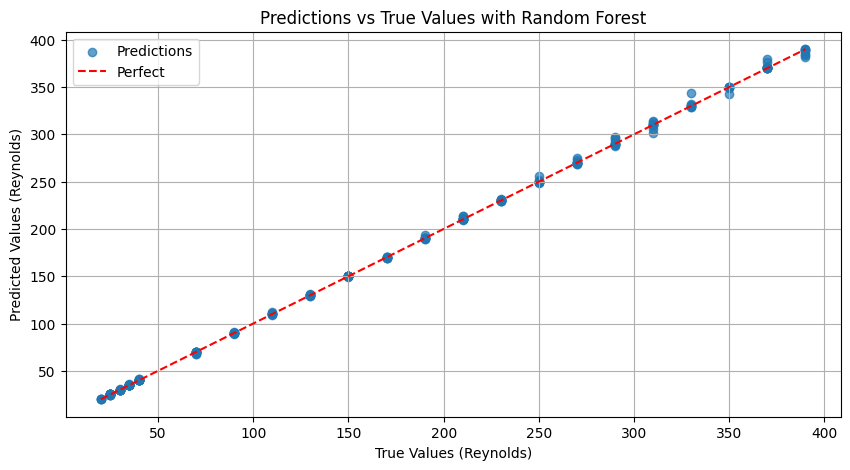

In [ ]:
# 1: charger les données
npz_folder = "/content/npz_files"

if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Automatically list all .npz files
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Extract Reynolds numbers from file names
reynolds_numbers = [float(f.split("_Re_")[1].split("_")[0]) for f in files]

# Load the data
X, y = [], []
for file, reynolds in zip(files, reynolds_numbers):
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']
    flattened = velocity_magnitudes.reshape(velocity_magnitudes.shape[0], -1)
    X.append(flattened)
    y.extend([reynolds] * flattened.shape[0])

# Convert to NumPy arrays
X = np.vstack(X)
y = np.array(y)

#2: Data preprocessing
# data training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des datas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#3:Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 4: Evaluate on the test data ---
y_pred = rf_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

#predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect')
plt.xlabel('True Values (Reynolds)')
plt.ylabel('Predicted Values (Reynolds)')
plt.title('Predictions vs True Values with Random Forest')
plt.legend()
plt.grid(True)
plt.show()

### Test RF

In [ ]:
#5 Test avec un autre fichier (a enregistrer ailleurs et ne pas mettre sur github)
# chargement des données non fournises pour l'apprentissage
new_file = "/content/velocity_magnitudes_data_Re_380.0_v_0.004.npz"

data_new = np.load(new_file)
velocity_magnitudes_new = data_new['velocity_magnitudes']

X_new = velocity_magnitudes_new.reshape(velocity_magnitudes_new.shape[0], -1)
X_new_scaled = scaler.transform(X_new)  # Normalize using the fitted scaler

# Predictions new data
predictions = rf_model.predict(X_new_scaled)

print(f"Predictions for the file '{new_file}':")
for i, pred in enumerate(predictions[:10]):  # Limit to 10 results for clarity
    print(f"Sample {i + 1}: Predicted Reynolds = {pred:.2f}")

Predictions for the file '/content/velocity_magnitudes_data_Re_380.0_v_0.004.npz':
Sample 1: Predicted Reynolds = 383.40
Sample 2: Predicted Reynolds = 378.20
Sample 3: Predicted Reynolds = 381.00
Sample 4: Predicted Reynolds = 382.00
Sample 5: Predicted Reynolds = 383.40
Sample 6: Predicted Reynolds = 380.40
Sample 7: Predicted Reynolds = 377.40
Sample 8: Predicted Reynolds = 378.00
Sample 9: Predicted Reynolds = 381.00
Sample 10: Predicted Reynolds = 378.40


### SVR

Test RMSE: 2.13
Test R²: 1.00


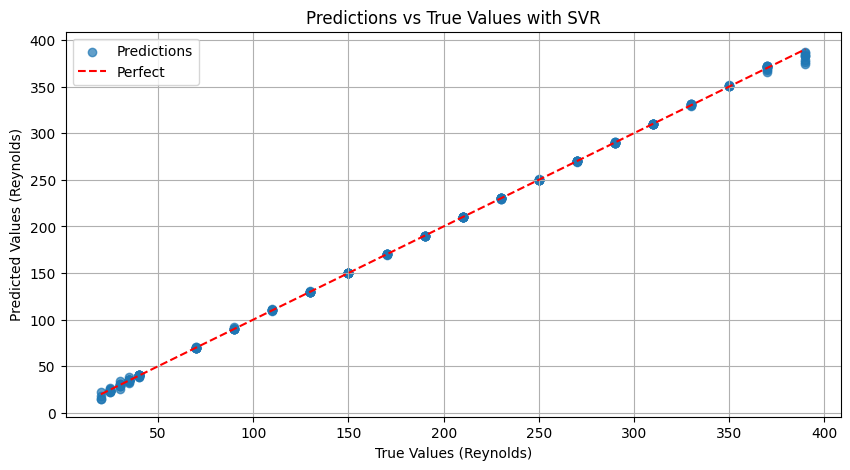

In [ ]:
# 1: Load files from the folder ---
# Path to the folder containing .npz files
npz_folder = "/content/npz_files"

# Check if the folder exists
if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Automatically list all .npz files
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Extract Reynolds numbers from file names
reynolds_numbers = [float(f.split("_Re_")[1].split("_")[0]) for f in files]

# Load the data
X, y = [], []
for file, reynolds in zip(files, reynolds_numbers):
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']
    flattened = velocity_magnitudes.reshape(velocity_magnitudes.shape[0], -1)
    X.append(flattened)
    y.extend([reynolds] * flattened.shape[0])

# Convert to NumPy arrays
X = np.vstack(X)
y = np.array(y)

# --- Step 2: Data preprocessing ---
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 3: Train the SVR model ---
svr_model = SVR(kernel='rbf', C=100, gamma='scale')
svr_model.fit(X_train_scaled, y_train)

# --- Step 4: Evaluate on the test data ---
y_pred = svr_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

# Visualize predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect')
plt.xlabel('True Values (Reynolds)')
plt.ylabel('Predicted Values (Reynolds)')
plt.title('Predictions vs True Values with SVR')
plt.legend()
plt.grid(True)
plt.show()

### Test SVR

In [ ]:
# --- Étape 5 : Vérification avec un autre fichier ---
# Charger un fichier supplémentaire pour prédiction
new_file = "/content/velocity_magnitudes_data_Re_60.0_v_0.004.npz"

# Charger les données du fichier
data_new = np.load(new_file)
velocity_magnitudes_new = data_new['velocity_magnitudes']

# Prétraitement des nouvelles données
X_new = velocity_magnitudes_new.reshape(velocity_magnitudes_new.shape[0], -1)
X_new_scaled = scaler.transform(X_new)  # Normalisation avec le scaler ajusté

# Prédictions sur les nouvelles données
predictions = svr_model.predict(X_new_scaled)

# Affichage des résultats
print(f"Prédictions pour le fichier '{new_file}':")
for i, pred in enumerate(predictions[:10]):  # Limiter à 10 résultats pour clarté
    print(f"Échantillon {i + 1}: Prédiction de Reynolds = {pred:.2f}")


Prédictions pour le fichier '/content/velocity_magnitudes_data_Re_60.0_v_0.004.npz':
Échantillon 1: Prédiction de Reynolds = 60.39
Échantillon 2: Prédiction de Reynolds = 60.55
Échantillon 3: Prédiction de Reynolds = 59.83
Échantillon 4: Prédiction de Reynolds = 61.83
Échantillon 5: Prédiction de Reynolds = 60.29
Échantillon 6: Prédiction de Reynolds = 60.37
Échantillon 7: Prédiction de Reynolds = 60.40
Échantillon 8: Prédiction de Reynolds = 60.29
Échantillon 9: Prédiction de Reynolds = 60.97
Échantillon 10: Prédiction de Reynolds = 60.55


### Linear Regression

RMSE sur test : 0.00
R² sur test : 1.00


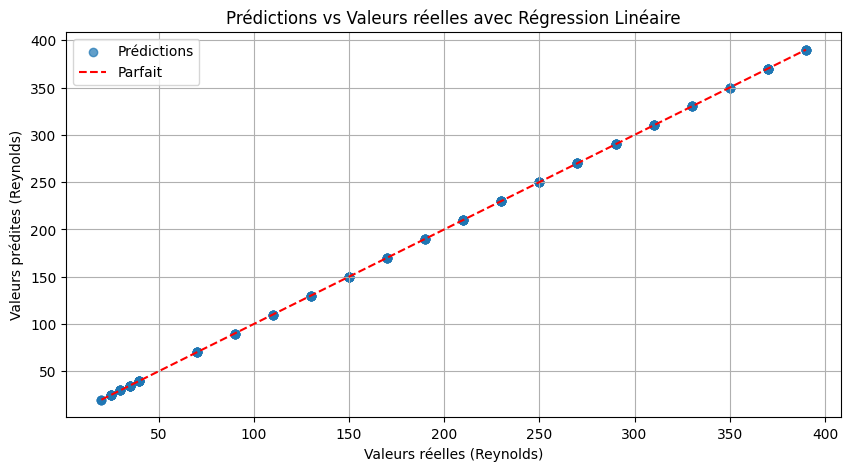

In [ ]:
# --- Étape 1 : Chargement des fichiers depuis le dossier ---
# Chemin vers le dossier contenant les fichiers .npz
npz_folder = "/content/npz_files"

# Vérifier que le dossier existe
if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"Le dossier '{npz_folder}' n'existe pas. Vérifie le chemin.")

# Lister automatiquement tous les fichiers .npz
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Extraire les Reynolds depuis les noms des fichiers
reynolds_numbers = [float(f.split("_Re_")[1].split("_")[0]) for f in files]

# Chargement des données
X, y = [], []
for file, reynolds in zip(files, reynolds_numbers):
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']
    flattened = velocity_magnitudes.reshape(velocity_magnitudes.shape[0], -1)
    X.append(flattened)
    y.extend([reynolds] * flattened.shape[0])

# Conversion en tableaux NumPy
X = np.vstack(X)
y = np.array(y)

# --- Étape 2 : Prétraitement des données ---
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Étape 3 : Entraînement du modèle ---
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# --- Étape 4 : Évaluation sur les données de test ---
y_pred = linear_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE sur test : {rmse:.2f}")
print(f"R² sur test : {r2:.2f}")

# Visualisation des prédictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Parfait')
plt.xlabel('Valeurs réelles (Reynolds)')
plt.ylabel('Valeurs prédites (Reynolds)')
plt.title('Prédictions vs Valeurs réelles avec Régression Linéaire')
plt.legend()
plt.grid(True)
plt.show()

### Test Linear Regression

In [ ]:
# --- Étape 5 : Vérification avec un autre fichier ---
# test avec un autre fichier (a enregistrer ailleurs et ne pas mettre sur github)
# Charger un fichier supplémentaire pour prédiction
new_file = "/content/velocity_magnitudes_data_Re_380.0_v_0.004.npz"

# Charger les données du fichier
data_new = np.load(new_file)
velocity_magnitudes_new = data_new['velocity_magnitudes']

# Prétraitement des nouvelles données
X_new = velocity_magnitudes_new.reshape(velocity_magnitudes_new.shape[0], -1)
X_new_scaled = scaler.transform(X_new)  # Normalisation avec le scaler ajusté

# Prédictions sur les nouvelles données
predictions = linear_model.predict(X_new_scaled)

# Affichage des résultats
print(f"Prédictions pour le fichier '{new_file}':")
for i, pred in enumerate(predictions[:10]):  # Limiter à 10 résultats pour clarté
    print(f"Échantillon {i + 1}: Prédiction de Reynolds = {pred:.2f}")

Prédictions pour le fichier '/content/velocity_magnitudes_data_Re_380.0_v_0.004.npz':
Échantillon 1: Prédiction de Reynolds = 380.00
Échantillon 2: Prédiction de Reynolds = 380.00
Échantillon 3: Prédiction de Reynolds = 380.00
Échantillon 4: Prédiction de Reynolds = 380.00
Échantillon 5: Prédiction de Reynolds = 380.00
Échantillon 6: Prédiction de Reynolds = 380.00
Échantillon 7: Prédiction de Reynolds = 380.00
Échantillon 8: Prédiction de Reynolds = 380.00
Échantillon 9: Prédiction de Reynolds = 380.00
Échantillon 10: Prédiction de Reynolds = 380.00


## Step 2

In [ ]:
import os
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import glob

def extract_metadata(filename):
    """
    Extracts Re and v values from the filename dynamically.
    Expected format: velocity_magnitudes_data_Re_<Re>_v_<v>.npz
    """
    basename = os.path.basename(filename)
    # Find "Re_" and "v_" substrings
    try:
        Re_start = basename.index("Re_") + 3
        v_start = basename.index("_v_") + 3

        # Extract values
        Re_end = basename.index("_", Re_start) if "_" in basename[Re_start:] else basename.index(".")
        v_end = basename.index(".", v_start)
        Re = float(basename[Re_start:Re_end])
        v = float(basename[v_start:v_end])
        return Re, v
    except ValueError as e:
        raise ValueError(f"Error parsing filename '{basename}': {e}")


def preprocess_data(file_paths):
    """
    Processes all files and extracts features with corresponding labels (Re, v).
    """
    X, y_Re, y_v = [], [], []

    for file in file_paths:
        # Load velocity magnitude field
        data = np.load(file)['velocity_magnitudes']
        Re, v = extract_metadata(file)

        # Flatten each time step and normalize globally
        flattened = data.reshape(data.shape[0], -1)
        flattened = flattened / np.max(flattened)  # Normalize

        # Compute statistical summaries for each time step
        mean_vals = np.mean(flattened, axis=1)
        var_vals = np.var(flattened, axis=1)
        max_vals = np.max(flattened, axis=1)
        min_vals = np.min(flattened, axis=1)

        # Combine features
        features = np.stack([mean_vals, var_vals, max_vals, min_vals], axis=1)
        X.extend(features)
        y_Re.extend([Re] * len(features))
        y_v.extend([v] * len(features))

    return np.array(X), np.array(y_Re), np.array(y_v)

def train_model(X, y, target_name):
    """
    Trains a Gradient Boosting Regressor and evaluates the model.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Use a pipeline for scaling and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gbr', GradientBoostingRegressor(random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Model for {target_name} - MSE: {mse:.4f}")

    return pipeline

if __name__ == "__main__":
    # Load all files
    file_paths = glob.glob('/content/npz_files/*.npz')  # Adjust path as needed

    # Preprocess data
    X, y_Re, y_v = preprocess_data(file_paths)

    # Train models
    model_Re = train_model(X, y_Re, "Reynolds number (Re)")
    model_v = train_model(X, y_v, "Inflow velocity (v)")


Model for Reynolds number (Re) - MSE: 1.1978
Model for Inflow velocity (v) - MSE: 0.0000


Model for Reynolds number (Re) - MSE: 1.1978
Model for Inflow velocity (v) - MSE: 0.0000

Predictions for Reynolds number (Re):
True: 190.00, Predicted: 190.00
True: 390.00, Predicted: 387.15
True: 350.00, Predicted: 350.31
True: 390.00, Predicted: 378.43
True: 350.00, Predicted: 350.08
True: 270.00, Predicted: 270.01
True: 70.00, Predicted: 70.01
True: 70.00, Predicted: 70.01
True: 390.00, Predicted: 389.44
True: 170.00, Predicted: 169.97

Predictions for Inflow velocity (v):
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000
True: 0.0000, Predicted: 0.0000


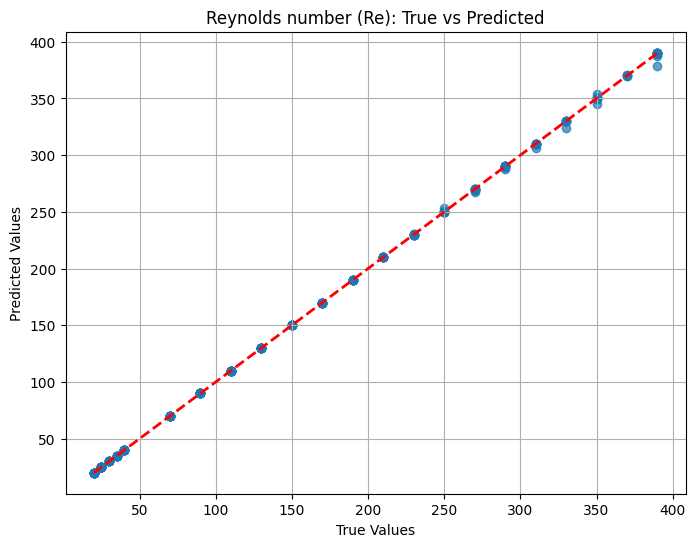

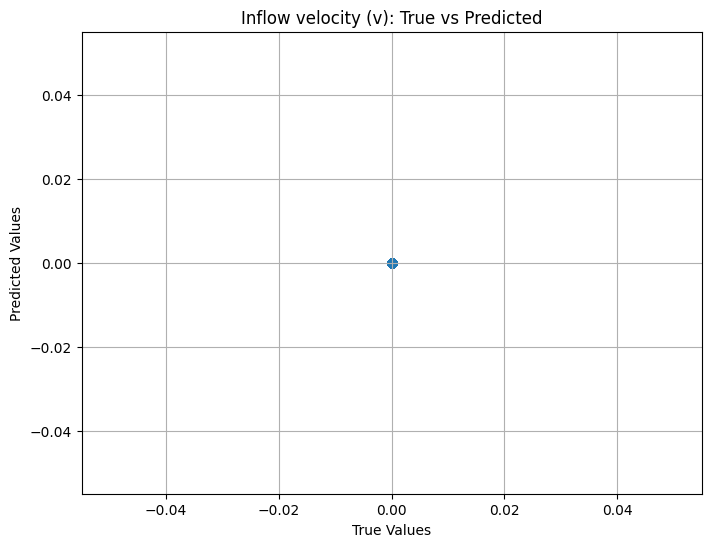

In [ ]:
import os
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import glob

def extract_metadata(filename):
    """
    Extracts Re and v values from the filename dynamically.
    Expected format: velocity_magnitudes_data_Re_<Re>_v_<v>.npz
    """
    basename = os.path.basename(filename)
    # Find "Re_" and "v_" substrings
    try:
        Re_start = basename.index("Re_") + 3
        v_start = basename.index("_v_") + 3

        # Extract values
        Re_end = basename.index("_", Re_start) if "_" in basename[Re_start:] else basename.index(".")
        v_end = basename.index(".", v_start)
        Re = float(basename[Re_start:Re_end])
        v = float(basename[v_start:v_end])
        return Re, v
    except ValueError as e:
        raise ValueError(f"Error parsing filename '{basename}': {e}")


def preprocess_data(file_paths):
    """
    Processes all files and extracts features with corresponding labels (Re, v).
    """
    X, y_Re, y_v = [], [], []

    for file in file_paths:
        # Load velocity magnitude field
        data = np.load(file)['velocity_magnitudes']
        Re, v = extract_metadata(file)

        # Flatten each time step and normalize globally
        flattened = data.reshape(data.shape[0], -1)
        flattened = flattened / np.max(flattened)  # Normalize

        # Compute statistical summaries for each time step
        mean_vals = np.mean(flattened, axis=1)
        var_vals = np.var(flattened, axis=1)
        max_vals = np.max(flattened, axis=1)
        min_vals = np.min(flattened, axis=1)

        # Combine features
        features = np.stack([mean_vals, var_vals, max_vals, min_vals], axis=1)
        X.extend(features)
        y_Re.extend([Re] * len(features))
        y_v.extend([v] * len(features))

    return np.array(X), np.array(y_Re), np.array(y_v)

def train_model(X, y, target_name):
    """
    Trains a Gradient Boosting Regressor, evaluates the model, and returns predictions.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Use a pipeline for scaling and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gbr', GradientBoostingRegressor(random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Model for {target_name} - MSE: {mse:.4f}")

    return pipeline, X_test, y_test, y_pred

if __name__ == "__main__":
    # Load all files
    file_paths = glob.glob('/content/npz_files/*.npz')  # Adjust path as needed

    # Preprocess data
    X, y_Re, y_v = preprocess_data(file_paths)

    # Train models
    model_Re, X_test_Re, y_test_Re, y_pred_Re = train_model(X, y_Re, "Reynolds number (Re)")
    model_v, X_test_v, y_test_v, y_pred_v = train_model(X, y_v, "Inflow velocity (v)")

    # Show predictions for Re
    print("\nPredictions for Reynolds number (Re):")
    for true_val, pred_val in zip(y_test_Re[:10], y_pred_Re[:10]):  # Display first 10 predictions
        print(f"True: {true_val:.2f}, Predicted: {pred_val:.2f}")

    # Show predictions for v
    print("\nPredictions for Inflow velocity (v):")
    for true_val, pred_val in zip(y_test_v[:10], y_pred_v[:10]):  # Display first 10 predictions
        print(f"True: {true_val:.4f}, Predicted: {pred_val:.4f}")

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    plt.show()

# In main function
plot_predictions(y_test_Re, y_pred_Re, "Reynolds number (Re): True vs Predicted")
plot_predictions(y_test_v, y_pred_v, "Inflow velocity (v): True vs Predicted")


RMSE: 3.91
R²: 1.00


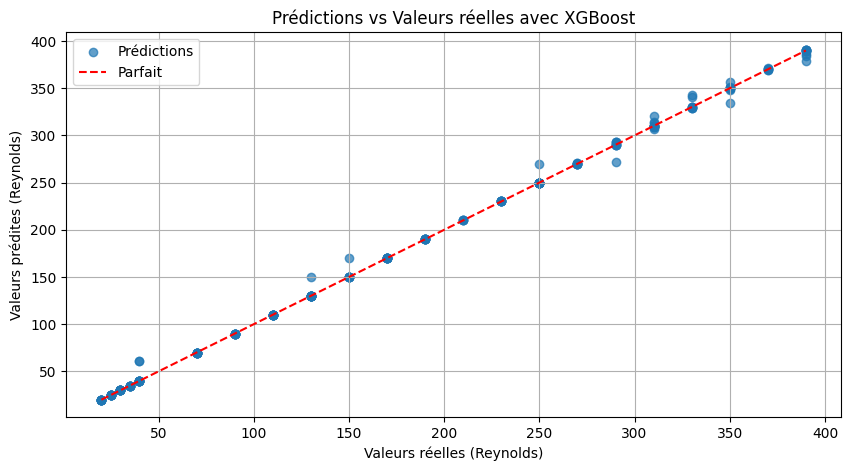

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1: Charger les données
npz_folder = "/content/npz_files"

if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Automatically list all .npz files
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Extract Reynolds numbers from file names
reynolds_numbers = [float(f.split("_Re_")[1].split("_")[0]) for f in files]

# Load the data
X, y = [], []
for file, reynolds in zip(files, reynolds_numbers):
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']
    flattened = velocity_magnitudes.reshape(velocity_magnitudes.shape[0], -1)
    X.append(flattened)
    y.extend([reynolds] * flattened.shape[0])

# Convert to NumPy arrays
X = np.vstack(X)
y = np.array(y)

# 2: Prétraitement des données
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3: Entraîner un modèle XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 4: Évaluation sur les données de test
y_pred = xgb_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 5: Visualisation des prédictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Parfait')
plt.xlabel('Valeurs réelles (Reynolds)')
plt.ylabel('Valeurs prédites (Reynolds)')
plt.title('Prédictions vs Valeurs réelles avec XGBoost')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 5: Test avec un autre fichier (à enregistrer ailleurs et ne pas mettre sur GitHub)
# Chargement des données non fournies pour l'apprentissage
new_file = "/content/velocity_magnitudes_data_Re_380.0_v_0.004.npz"

# Charger les données du fichier
data_new = np.load(new_file)
velocity_magnitudes_new = data_new['velocity_magnitudes']

# Prétraitement des données (reformater et normaliser)
X_new = velocity_magnitudes_new.reshape(velocity_magnitudes_new.shape[0], -1)
X_new_scaled = scaler.transform(X_new)  # Normaliser en utilisant le scaler ajusté pendant l'entraînement

# Prédictions sur les nouvelles données avec le modèle XGBoost
predictions = xgb_model.predict(X_new_scaled)

# Affichage des prédictions
print(f"Predictions for the file '{new_file}':")
for i, pred in enumerate(predictions[:10]):  # Limiter à 10 résultats pour plus de clarté
    print(f"Sample {i + 1}: Predicted Reynolds = {pred:.2f}")


Predictions for the file '/content/velocity_magnitudes_data_Re_380.0_v_0.004.npz':
Sample 1: Predicted Reynolds = 373.27
Sample 2: Predicted Reynolds = 378.59
Sample 3: Predicted Reynolds = 380.43
Sample 4: Predicted Reynolds = 379.09
Sample 5: Predicted Reynolds = 381.17
Sample 6: Predicted Reynolds = 386.10
Sample 7: Predicted Reynolds = 381.58
Sample 8: Predicted Reynolds = 378.13
Sample 9: Predicted Reynolds = 385.38
Sample 10: Predicted Reynolds = 384.37


## TensorFlow/Keras : réseau de neurones entièrement connecté (Fully Connected Neural Network).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 28389.9941 - mae: 131.0453 - val_loss: 2319.6968 - val_mae: 38.2723
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3717.2832 - mae: 44.4509 - val_loss: 293.2920 - val_mae: 12.6029
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1526.6366 - mae: 27.6358 - val_loss: 114.9236 - val_mae: 8.1453
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1482.3832 - mae: 26.7986 - val_loss: 244.1149 - val_mae: 12.6471
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1139.0281 - mae: 23.1897 - val_loss: 372.4030 - val_mae: 14.2782
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1175.9977 - mae: 23.2006 - val_loss: 443.2029 - val_mae: 16.9511
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 871.4990 - mae: 21.0779 - val_loss: 272.2214 - val_mae: 13.5677
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1060.0040 - mae: 21.7314 - val_loss: 472.8953 - val_mae: 18.8848
Epoch 9

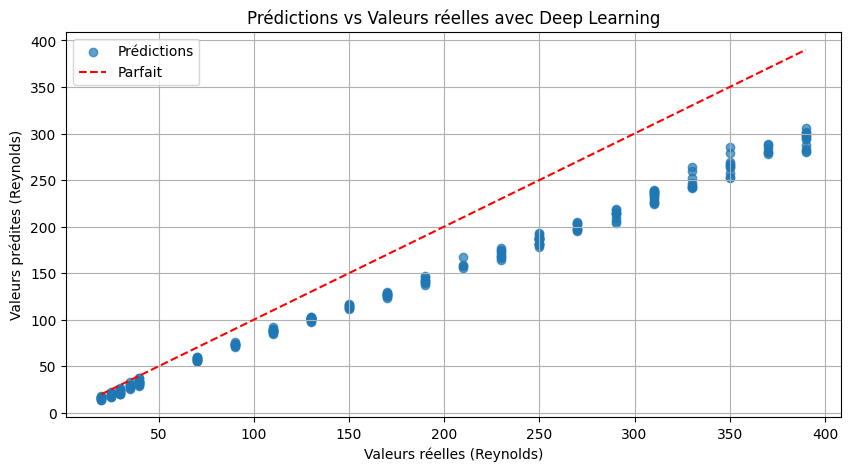

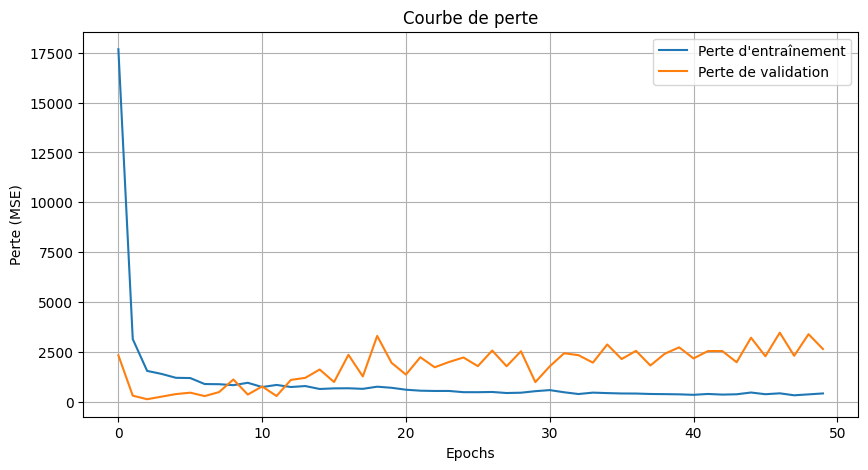

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1: Charger les données
npz_folder = "/content/npz_files"

if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Automatically list all .npz files
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Extract Reynolds numbers from file names
reynolds_numbers = [float(f.split("_Re_")[1].split("_")[0]) for f in files]

# Load the data
X, y = [], []
for file, reynolds in zip(files, reynolds_numbers):
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']
    flattened = velocity_magnitudes.reshape(velocity_magnitudes.shape[0], -1)
    X.append(flattened)
    y.extend([reynolds] * flattened.shape[0])

# Convert to NumPy arrays
X = np.vstack(X)
y = np.array(y)

# 2: Prétraitement des données
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3: Création du modèle de Deep Learning
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Prédiction d'une seule valeur (Reynolds)
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 4: Entraîner le modèle
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# 5: Évaluation du modèle
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred = model.predict(X_test_scaled).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 6: Visualisation des prédictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Parfait')
plt.xlabel('Valeurs réelles (Reynolds)')
plt.ylabel('Valeurs prédites (Reynolds)')
plt.title('Prédictions vs Valeurs réelles avec Deep Learning')
plt.legend()
plt.grid(True)
plt.show()

# 7: Visualisation de la perte
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.xlabel('Epochs')
plt.ylabel('Perte (MSE)')
plt.title('Courbe de perte')
plt.legend()
plt.grid(True)
plt.show()


1. Chargement des données
Le code charge des fichiers .npz contenant les données d'écoulement (magnitudes de vitesse).
Les nombres de Reynolds sont extraits des noms de fichiers.
Les données sont rassemblées en deux matrices principales :
X : les caractéristiques (magnitudes de vitesse aplaties).
y : les cibles (les nombres de Reynolds).
2. Prétraitement des données
Les données sont divisées en ensembles d'entraînement (80%) et de test (20%) pour l'évaluation.
Les données sont normalisées à l'aide de StandardScaler pour faciliter l'entraînement du réseau de neurones.
3. Création du modèle de Deep Learning
Un modèle séquentiel est défini avec plusieurs couches :
Dense (128, 64, 32 neurones) : couches entièrement connectées avec la fonction d'activation ReLU.
Dropout (20%) : pour réduire le surapprentissage en désactivant aléatoirement des neurones.
Dense (1) : sortie unique pour prédire le nombre de Reynolds.
4. Entraînement du modèle
Le modèle est compilé avec l'optimiseur Adam, une fonction de perte MSE (Mean Squared Error), et une métrique MAE (Mean Absolute Error).
Les données d'entraînement sont utilisées pour ajuster les poids du modèle, avec 20% des données d'entraînement réservées pour la validation.
5. Évaluation du modèle
Le modèle est évalué sur l'ensemble de test en utilisant les métriques RMSE (Root Mean Squared Error) et
𝑅
2
R
2
  (coefficient de détermination).
Les prédictions sont comparées aux valeurs réelles pour mesurer la précision.
6. Visualisation
Deux graphes sont générés :
Prédictions vs Valeurs réelles : montre la corrélation entre les valeurs prédites et réelles.
Courbe de perte : montre l'évolution de la perte d'entraînement et de validation au fil des époques.
Points clés :
Flexibilité : le réseau peut être ajusté en ajoutant/supprimant des couches ou en modifiant les hyperparamètres.
Évaluation visuelle : les graphiques permettent d'évaluer si le modèle apprend correctement ou s'il surapprend.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - loss: 31416.3379 - mae: 143.1130 - val_loss: 14463.7207 - val_mae: 105.1202
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 219ms/step - loss: 14391.4170 - mae: 105.1016 - val_loss: 14366.2285 - val_mae: 105.0864
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - loss: 15345.6904 - mae: 108.4395 - val_loss: 14508.7891 - val_mae: 105.2266
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - loss: 15298.0068 - mae: 108.5314 - val_loss: 14539.1025 - val_mae: 106.1675
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 22s 214ms/step - loss: 15503.5635 - mae: 109.1505 - val_loss: 15181.7500 - val_mae: 108.2312
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - loss: 14530.4912 - mae: 104.0265 - val_loss: 14555.2490 - val_mae: 106.2120
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - loss: 14345.7705 - mae: 105.2386 - val_loss: 14771.3701 - val_mae: 107.0162
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - loss: 14968.2236 - mae: 105.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
Version 1 - Prédiction de Reynolds:
RMSE: 134.56
R²: -0.25
Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 3.3717e-05 - mae: 0.0036 - val_loss: 5.7956e-07 - val_mae: 5.4305e-04
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 3.6883e-07 - mae: 4.2344e-04 - val_loss: 4.7433e-08 - val_mae: 1.5594e-04
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 3.4531e-08 - mae: 1.2974e-04 - val_loss: 1.1819e-08 - val_mae: 6.8111e-05
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 1.0679e-08 - mae: 6.1732e-05 - val_loss: 7.3325e-09 - val_mae: 4.4691e-05
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 7.0324e-09 - mae: 4.0994e-05 - val_loss: 6.3616e-09 - val_mae: 3.5124e-05
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 6.4069e-09 - mae: 3.2267e-05 - val_loss: 5.8300e-09 - val_mae: 2.8844e-05
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 5.8391e-09 - mae: 2.6769e-05 - val_loss: 5.7225e-

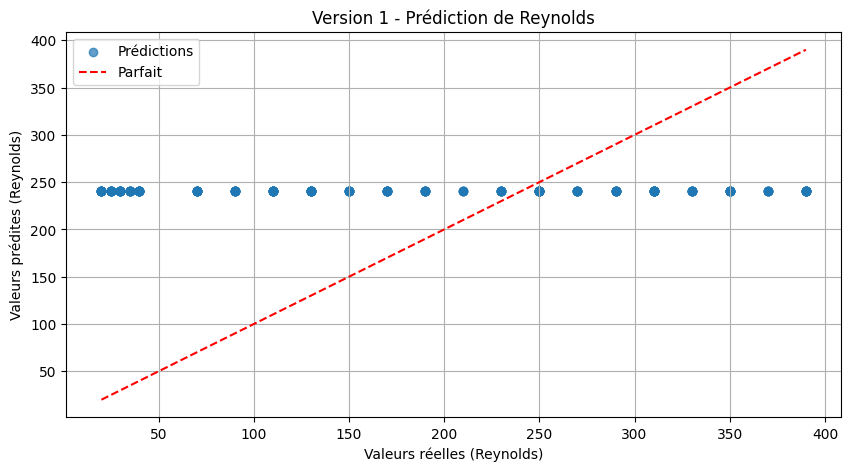

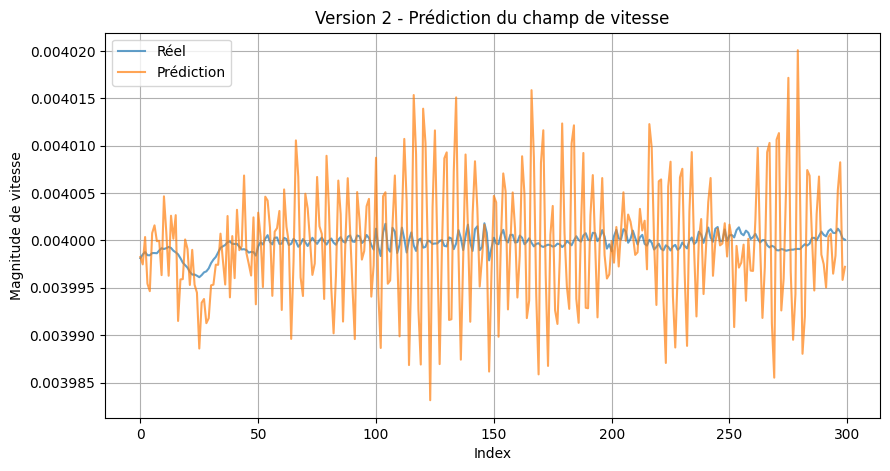

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input, Concatenate, Reshape
from tensorflow.keras.optimizers import Adam

# 1: Charger les données à partir de plusieurs fichiers
npz_folder = "/content/npz_files"

if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Lister tous les fichiers .npz
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Variables pour stocker les données combinées
X_velocity, X_extra, y_reynolds, y_velocity = [], [], [], []

for file in files:
    # Charger le fichier
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']  # Forme (n, h, w)

    # Extraire Reynolds et vitesse d'entrée depuis le nom de fichier
    file_name = os.path.basename(file)
    reynolds = float(file_name.split("_Re_")[1].split("_")[0])
    velocity_inlet = float(file_name.split("_v_")[1].split(".")[0]) / 1000  # Ajustement si nécessaire

    # Ajouter une dimension de canal pour le CNN
    velocity_magnitudes = velocity_magnitudes[..., np.newaxis]  # Nouvelle forme : (n, h, w, 1)

    # Ajouter aux listes combinées
    X_velocity.append(velocity_magnitudes)
    X_extra.extend([[reynolds, velocity_inlet]] * velocity_magnitudes.shape[0])
    y_reynolds.extend([reynolds] * velocity_magnitudes.shape[0])
    y_velocity.append(velocity_magnitudes)

# Convertir en tableaux NumPy
X_velocity = np.concatenate(X_velocity, axis=0)
y_velocity = np.concatenate(y_velocity, axis=0)
X_extra = np.array(X_extra)
y_reynolds = np.array(y_reynolds)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, X_extra_train, X_extra_test, y_reynolds_train, y_reynolds_test, y_velocity_train, y_velocity_test = train_test_split(
    X_velocity, X_extra, y_reynolds, y_velocity, test_size=0.2, random_state=42
)

# Normalisation des caractéristiques supplémentaires
scaler = StandardScaler()
X_extra_train_scaled = scaler.fit_transform(X_extra_train)
X_extra_test_scaled = scaler.transform(X_extra_test)

# 2: Version 1 - Prédire Reynolds
cnn_model_reynolds = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Prédiction du Reynolds
])

cnn_model_reynolds.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_reynolds = cnn_model_reynolds.fit(
    X_train, y_reynolds_train,
    validation_split=0.2,
    epochs=20,
    batch_size=8,
    verbose=1
)

# Évaluer le modèle
reynolds_loss, reynolds_mae = cnn_model_reynolds.evaluate(X_test, y_reynolds_test, verbose=0)
reynolds_predictions = cnn_model_reynolds.predict(X_test).flatten()

reynolds_rmse = np.sqrt(mean_squared_error(y_reynolds_test, reynolds_predictions))
reynolds_r2 = r2_score(y_reynolds_test, reynolds_predictions)

print(f"Version 1 - Prédiction de Reynolds:")
print(f"RMSE: {reynolds_rmse:.2f}")
print(f"R²: {reynolds_r2:.2f}")

# 3: Version 2 - Prédire le champ de vitesse
input_reynolds = Input(shape=(X_extra_train_scaled.shape[1],))
input_velocity = Input(shape=X_train.shape[1:])

x = Flatten()(input_velocity)
x = Dense(64, activation='relu')(x)
x = Concatenate()([x, input_reynolds])
x = Dense(128, activation='relu')(x)
x = Dense(np.prod(X_train.shape[1:]), activation='linear')(x)
out = Reshape(X_train.shape[1:])(x)

cnn_model_velocity = Model(inputs=[input_velocity, input_reynolds], outputs=out)

cnn_model_velocity.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_velocity = cnn_model_velocity.fit(
    [X_train, X_extra_train_scaled], y_velocity_train,
    validation_split=0.2,
    epochs=20,
    batch_size=8,
    verbose=1
)

# Évaluer le modèle
velocity_loss, velocity_mae = cnn_model_velocity.evaluate([X_test, X_extra_test_scaled], y_velocity_test, verbose=0)
velocity_predictions = cnn_model_velocity.predict([X_test, X_extra_test_scaled])

velocity_rmse = np.sqrt(mean_squared_error(y_velocity_test.flatten(), velocity_predictions.flatten()))

print(f"\nVersion 2 - Prédiction du champ de vitesse:")
print(f"RMSE: {velocity_rmse:.2f}")

# 4: Visualisations
# Visualisation des prédictions Reynolds
plt.figure(figsize=(10, 5))
plt.scatter(y_reynolds_test, reynolds_predictions, alpha=0.7, label='Prédictions')
plt.plot([min(y_reynolds_test), max(y_reynolds_test)], [min(y_reynolds_test), max(y_reynolds_test)], color='red', linestyle='--', label='Parfait')
plt.xlabel('Valeurs réelles (Reynolds)')
plt.ylabel('Valeurs prédites (Reynolds)')
plt.title('Version 1 - Prédiction de Reynolds')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation des prédictions du champ de vitesse
plt.figure(figsize=(10, 5))
plt.plot(y_velocity_test.flatten()[:300], label='Réel', alpha=0.7)
plt.plot(velocity_predictions.flatten()[:300], label='Prédiction', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Magnitude de vitesse')
plt.title('Version 2 - Prédiction du champ de vitesse')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 384ms/step - loss: 33951.1328 - mae: 150.3826 - val_loss: 18567.6074 - val_mae: 117.0481
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 381ms/step - loss: 17559.1484 - mae: 113.3554 - val_loss: 14723.4346 - val_mae: 106.8389
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 384ms/step - loss: 13425.4502 - mae: 98.8545 - val_loss: 14852.9824 - val_mae: 107.2945
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 377ms/step - loss: 14989.8389 - mae: 105.9619 - val_loss: 14364.5127 - val_mae: 105.1109
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 389ms/step - loss: 14118.9678 - mae: 102.2596 - val_loss: 14364.5420 - val_mae: 105.0995
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 384ms/step - loss: 14548.1797 - mae: 104.5405 - val_loss: 14364.0000 - val_mae: 105.1120
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 380ms/step - loss: 16331.9971 - mae: 111.4753 - val_loss: 14363.4873 - val_mae: 105.1323
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 390ms/step - loss: 16028.4521 - mae: 109.2

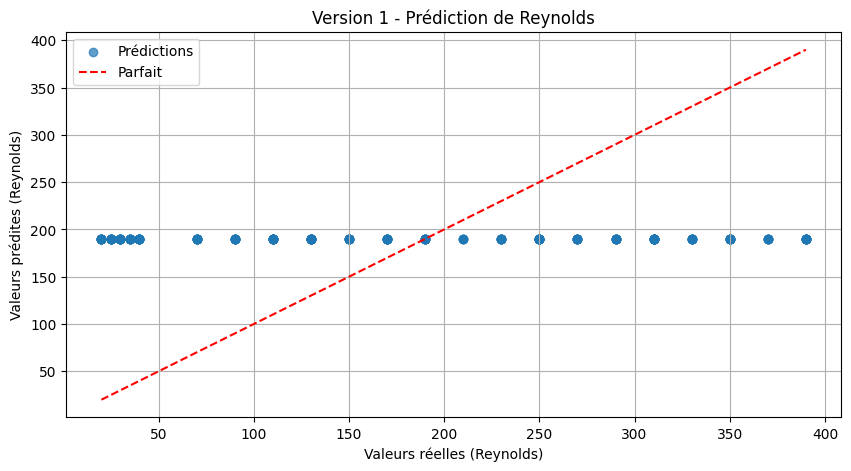

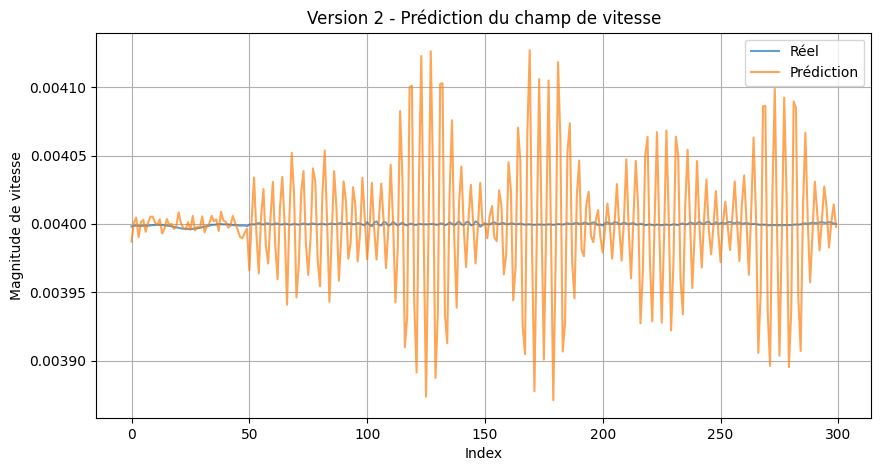

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input, Concatenate, Reshape, Dropout
from tensorflow.keras.optimizers import Adam

# 1: Charger les données à partir de plusieurs fichiers
npz_folder = "/content/npz_files"

if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Lister tous les fichiers .npz
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Variables pour stocker les données combinées
X_velocity, X_extra, y_reynolds, y_velocity = [], [], [], []

for file in files:
    # Charger le fichier
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']  # Forme (n, h, w)

    # Extraire Reynolds et vitesse d'entrée depuis le nom de fichier
    file_name = os.path.basename(file)
    reynolds = float(file_name.split("_Re_")[1].split("_")[0])
    velocity_inlet = float(file_name.split("_v_")[1].split(".")[0]) / 1000  # Ajustement si nécessaire

    # Ajouter une dimension de canal pour le CNN
    velocity_magnitudes = velocity_magnitudes[..., np.newaxis]  # Nouvelle forme : (n, h, w, 1)

    # Ajouter aux listes combinées
    X_velocity.append(velocity_magnitudes)
    X_extra.extend([[reynolds, velocity_inlet]] * velocity_magnitudes.shape[0])
    y_reynolds.extend([reynolds] * velocity_magnitudes.shape[0])
    y_velocity.append(velocity_magnitudes)

# Convertir en tableaux NumPy
X_velocity = np.concatenate(X_velocity, axis=0)
y_velocity = np.concatenate(y_velocity, axis=0)
X_extra = np.array(X_extra)
y_reynolds = np.array(y_reynolds)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, X_extra_train, X_extra_test, y_reynolds_train, y_reynolds_test, y_velocity_train, y_velocity_test = train_test_split(
    X_velocity, X_extra, y_reynolds, y_velocity, test_size=0.2, random_state=42
)

# Normalisation des caractéristiques supplémentaires
scaler = StandardScaler()
X_extra_train_scaled = scaler.fit_transform(X_extra_train)
X_extra_test_scaled = scaler.transform(X_extra_test)

# 2: Version 1 - Prédire Reynolds
cnn_model_reynolds = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Prédiction du Reynolds
])

cnn_model_reynolds.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_reynolds = cnn_model_reynolds.fit(
    X_train, y_reynolds_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Évaluer le modèle
reynolds_loss, reynolds_mae = cnn_model_reynolds.evaluate(X_test, y_reynolds_test, verbose=0)
reynolds_predictions = cnn_model_reynolds.predict(X_test).flatten()

reynolds_rmse = np.sqrt(mean_squared_error(y_reynolds_test, reynolds_predictions))
reynolds_r2 = r2_score(y_reynolds_test, reynolds_predictions)

print(f"Version 1 - Prédiction de Reynolds:")
print(f"RMSE: {reynolds_rmse:.2f}")
print(f"R²: {reynolds_r2:.2f}")

# 3: Version 2 - Prédire le champ de vitesse
input_reynolds = Input(shape=(X_extra_train_scaled.shape[1],))
input_velocity = Input(shape=X_train.shape[1:])

x = Flatten()(input_velocity)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Concatenate()([x, input_reynolds])
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(np.prod(X_train.shape[1:]), activation='linear')(x)
out = Reshape(X_train.shape[1:])(x)

cnn_model_velocity = Model(inputs=[input_velocity, input_reynolds], outputs=out)

cnn_model_velocity.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_velocity = cnn_model_velocity.fit(
    [X_train, X_extra_train_scaled], y_velocity_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Évaluer le modèle
velocity_loss, velocity_mae = cnn_model_velocity.evaluate([X_test, X_extra_test_scaled], y_velocity_test, verbose=0)
velocity_predictions = cnn_model_velocity.predict([X_test, X_extra_test_scaled])

velocity_rmse = np.sqrt(mean_squared_error(y_velocity_test.flatten(), velocity_predictions.flatten()))

print(f"\nVersion 2 - Prédiction du champ de vitesse:")
print(f"RMSE: {velocity_rmse:.2f}")

# 4: Visualisations
# Visualisation des prédictions Reynolds
plt.figure(figsize=(10, 5))
plt.scatter(y_reynolds_test, reynolds_predictions, alpha=0.7, label='Prédictions')
plt.plot([min(y_reynolds_test), max(y_reynolds_test)], [min(y_reynolds_test), max(y_reynolds_test)], color='red', linestyle='--', label='Parfait')
plt.xlabel('Valeurs réelles (Reynolds)')
plt.ylabel('Valeurs prédites (Reynolds)')
plt.title('Version 1 - Prédiction de Reynolds')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation des prédictions du champ de vitesse
plt.figure(figsize=(10, 5))
plt.plot(y_velocity_test.flatten()[:300], label='Réel', alpha=0.7)
plt.plot(velocity_predictions.flatten()[:300], label='Prédiction', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Magnitude de vitesse')
plt.title('Version 2 - Prédiction du champ de vitesse')
plt.legend()
plt.grid(True)
plt.show()


Ce code utilise des réseaux neuronaux convolutifs (CNN) pour deux tâches principales :

Prédiction du nombre de Reynolds à partir des champs de vitesse et de la vitesse d'entrée.
Prédiction du champ de vitesse complet à partir du nombre de Reynolds et de la vitesse d'entrée.
Nom de l'algorithme
L'algorithme principal est le Réseau Neuronal Convolutif (CNN), adapté pour des données structurées comme les champs de vitesse (images en 2D).

Utilisation
Cet algorithme est utilisé pour :

Modéliser des relations complexes entre les entrées et les sorties dans des phénomènes physiques.
Exploiter les structures spatiales (comme les images) pour apprendre des relations pertinentes.
Fonctionnement
Étape 1 : Chargement des données

Les fichiers .npz contiennent des champs de vitesse sous forme de tableaux 3D (temps, hauteur, largeur).
Le code extrait également des paramètres comme le Reynolds et la vitesse d'entrée depuis les noms des fichiers.
Étape 2 : Prétraitement

Les données sont normalisées (StandardScaler) pour améliorer la convergence du modèle.
Les champs de vitesse sont transformés pour inclure une dimension de canal (nécessaire pour le CNN).
Étape 3 : Entraînement des modèles

Modèle 1 : Prédiction de Reynolds
Utilise plusieurs couches convolutives, des couches de pooling (réduction de dimension) et des couches denses.
Modèle 2 : Prédiction du champ de vitesse
Combine les caractéristiques extraites du champ de vitesse avec des données supplémentaires (Reynolds et vitesse d'entrée).
Étape 4 : Évaluation

Les métriques incluent :
RMSE (Root Mean Square Error) pour mesurer l'écart entre les prédictions et les valeurs réelles.
R² pour mesurer la proportion de variance expliquée.
Étape 5 : Visualisation

Les prédictions et les valeurs réelles sont comparées à l'aide de graphiques.
Paramètres à ajuster pour améliorer la précision
Taux d'apprentissage (learning_rate)

Par défaut à 0.001, réduire à 0.0001 si le modèle oscille ou ne converge pas.
Nombre d'époques (epochs)

Actuellement à 50. Augmenter si le modèle ne converge pas, mais surveiller le surajustement.
Taille des lots (batch_size)

Fixée à 16. Des tailles plus grandes peuvent accélérer l'entraînement mais nécessitent plus de mémoire.
Nombre de filtres et tailles des couches convolutives

Ajouter plus de filtres ou de couches peut améliorer la capacité d'apprentissage.
Dropout

Actuellement à 0.3. Augmenter pour réduire le surajustement, diminuer pour améliorer l'apprentissage si les données sont limitées.
Concepts importants
Époque (epoch) :

Une époque correspond à un passage complet sur toutes les données d'entraînement.
Plusieurs époques permettent au modèle de mieux apprendre les relations complexes.
RMSE :

Indique la différence moyenne entre les prédictions et les vraies valeurs.
R² :

Mesure de la qualité de la prédiction. Une valeur proche de 1 indique une bonne performance.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 381ms/step - loss: 36144.0703 - mae: 158.8210 - val_loss: 14512.0098 - val_mae: 105.2352
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 415ms/step - loss: 15572.4805 - mae: 107.8038 - val_loss: 14371.6895 - val_mae: 104.9929
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - loss: 15999.8760 - mae: 108.5559 - val_loss: 14471.7236 - val_mae: 105.1413
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 385ms/step - loss: 15975.7988 - mae: 109.3547 - val_loss: 14724.0215 - val_mae: 106.8408
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 381ms/step - loss: 14639.4893 - mae: 104.4573 - val_loss: 14402.5596 - val_mae: 104.9216
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 373ms/step - loss: 14833.0078 - mae: 104.2837 - val_loss: 14368.6348 - val_mae: 105.3173
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - loss: 16610.3340 - mae: 108.9755 - val_loss: 14366.5010 - val_mae: 105.2628
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 371ms/step - loss: 15053.0303 - mae: 107.

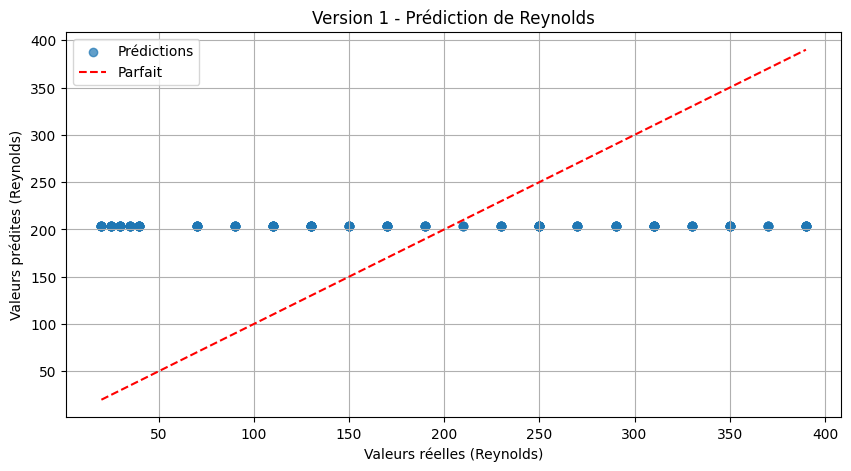

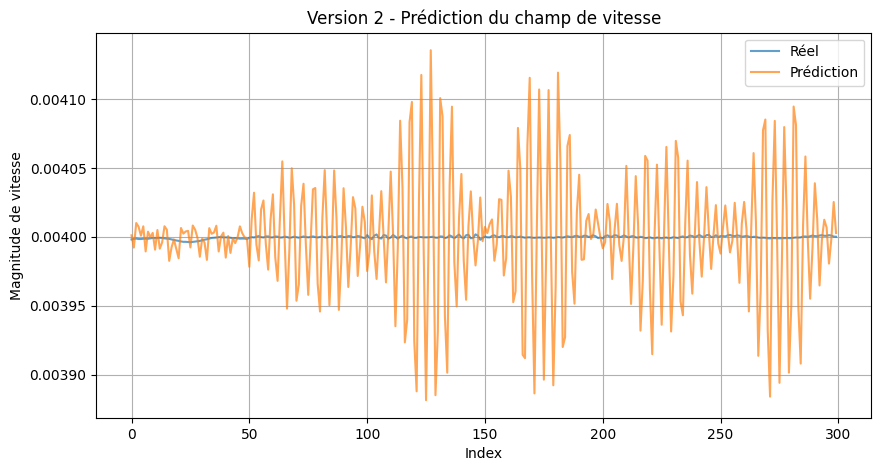

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input, Concatenate, Reshape, Dropout
from tensorflow.keras.optimizers import Adam

# 1: Charger les données à partir de plusieurs fichiers
npz_folder = "/content/npz_files"

if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Lister tous les fichiers .npz
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Variables pour stocker les données combinées
X_velocity, X_extra, y_reynolds, y_velocity = [], [], [], []

for file in files:
    # Charger le fichier
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']  # Forme (n, h, w)

    # Extraire Reynolds et vitesse d'entrée depuis le nom de fichier
    file_name = os.path.basename(file)
    reynolds = float(file_name.split("_Re_")[1].split("_")[0])
    velocity_inlet = float(file_name.split("_v_")[1].split(".")[0]) / 1000  # Ajustement si nécessaire

    # Ajouter une dimension de canal pour le CNN
    velocity_magnitudes = velocity_magnitudes[..., np.newaxis]  # Nouvelle forme : (n, h, w, 1)

    # Ajouter aux listes combinées
    X_velocity.append(velocity_magnitudes)
    X_extra.extend([[reynolds, velocity_inlet]] * velocity_magnitudes.shape[0])
    y_reynolds.extend([reynolds] * velocity_magnitudes.shape[0])
    y_velocity.append(velocity_magnitudes)

# Convertir en tableaux NumPy
X_velocity = np.concatenate(X_velocity, axis=0)
y_velocity = np.concatenate(y_velocity, axis=0)
X_extra = np.array(X_extra)
y_reynolds = np.array(y_reynolds)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, X_extra_train, X_extra_test, y_reynolds_train, y_reynolds_test, y_velocity_train, y_velocity_test = train_test_split(
    X_velocity, X_extra, y_reynolds, y_velocity, test_size=0.2, random_state=42
)

# Normalisation des caractéristiques supplémentaires
scaler = StandardScaler()
X_extra_train_scaled = scaler.fit_transform(X_extra_train)
X_extra_test_scaled = scaler.transform(X_extra_test)

# 2: Version 1 - Prédire Reynolds
cnn_model_reynolds = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Prédiction du Reynolds
])

cnn_model_reynolds.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_reynolds = cnn_model_reynolds.fit(
    X_train, y_reynolds_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Évaluer le modèle
reynolds_loss, reynolds_mae = cnn_model_reynolds.evaluate(X_test, y_reynolds_test, verbose=0)
reynolds_predictions = cnn_model_reynolds.predict(X_test).flatten()

reynolds_rmse = np.sqrt(mean_squared_error(y_reynolds_test, reynolds_predictions))
reynolds_r2 = r2_score(y_reynolds_test, reynolds_predictions)

print(f"Version 1 - Prédiction de Reynolds:")
print(f"RMSE: {reynolds_rmse:.2f}")
print(f"R²: {reynolds_r2:.2f}")

# 3: Version 2 - Prédire le champ de vitesse
input_reynolds = Input(shape=(X_extra_train_scaled.shape[1],))
input_velocity = Input(shape=X_train.shape[1:])

x = Flatten()(input_velocity)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Concatenate()([x, input_reynolds])
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(np.prod(X_train.shape[1:]), activation='linear')(x)
out = Reshape(X_train.shape[1:])(x)

cnn_model_velocity = Model(inputs=[input_velocity, input_reynolds], outputs=out)

cnn_model_velocity.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_velocity = cnn_model_velocity.fit(
    [X_train, X_extra_train_scaled], y_velocity_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Évaluer le modèle
velocity_loss, velocity_mae = cnn_model_velocity.evaluate([X_test, X_extra_test_scaled], y_velocity_test, verbose=0)
velocity_predictions = cnn_model_velocity.predict([X_test, X_extra_test_scaled])

velocity_rmse = np.sqrt(mean_squared_error(y_velocity_test.flatten(), velocity_predictions.flatten()))

print(f"\nVersion 2 - Prédiction du champ de vitesse:")
print(f"RMSE: {velocity_rmse:.2f}")

# 4: Visualisations
# Visualisation des prédictions Reynolds
plt.figure(figsize=(10, 5))
plt.scatter(y_reynolds_test, reynolds_predictions, alpha=0.7, label='Prédictions')
plt.plot([min(y_reynolds_test), max(y_reynolds_test)], [min(y_reynolds_test), max(y_reynolds_test)], color='red', linestyle='--', label='Parfait')
plt.xlabel('Valeurs réelles (Reynolds)')
plt.ylabel('Valeurs prédites (Reynolds)')
plt.title('Version 1 - Prédiction de Reynolds')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation des prédictions du champ de vitesse
plt.figure(figsize=(10, 5))
plt.plot(y_velocity_test.flatten()[:300], label='Réel', alpha=0.7)
plt.plot(velocity_predictions.flatten()[:300], label='Prédiction', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Magnitude de vitesse')
plt.title('Version 2 - Prédiction du champ de vitesse')
plt.legend()
plt.grid(True)
plt.show()


Explication des modifications pour gérer un petit jeu de données
Réduction de la taille des modèles :

Les couches convolutives et denses ont été ajustées avec un nombre de filtres et de neurones modéré. Par exemple :
Première couche convolutive : 32 filtres.
Deuxième couche convolutive : 64 filtres.
Couches denses finales : 128 et 256 neurones.
Cela limite la complexité du modèle pour éviter un surajustement lorsque les données sont limitées.
Ajout de Dropout :

Une régularisation par Dropout (taux de 30 %) a été ajoutée après les couches denses pour désactiver aléatoirement des neurones pendant l'entraînement. Cela réduit la dépendance du modèle à des neurones spécifiques et améliore la généralisation.
Augmentation de données (Data Augmentation) :

Bien que non inclus dans ce code, l'idée d'utiliser des transformations des champs de vitesse, telles que des translations ou des rotations, peut enrichir artificiellement le jeu de données.
Validation croisée :

Le modèle utilise une validation automatique sur 20 % des données d'entraînement pour maximiser l'efficacité du petit jeu de données.
Augmentation des époques :

Le nombre d'époques est augmenté à 50 pour permettre au modèle d'apprendre suffisamment à partir des données limitées, tout en surveillant le surajustement.
Taille de batch ajustée :

Une taille de lot (batch size) de 16 a été choisie pour optimiser l'efficacité de l'entraînement tout en maintenant la stabilité.
Utilisation de métriques adaptées :

La fonction de perte utilisée est mean_squared_error (mse) pour les tâches de régression.
Les métriques supplémentaires incluent l'erreur quadratique moyenne (RMSE) et le coefficient de détermination (R²) pour évaluer la précision des modèles.
Concepts importants
Surajustement : Avec peu de données, un modèle complexe mémorise les exemples d'entraînement au lieu de généraliser. Les ajustements tels que Dropout et la régularisation réduisent ce risque.
Époque (epoch) : Une époque correspond à un passage complet sur toutes les données d'entraînement. L'augmentation des époques permet au modèle d'améliorer sa compréhension des données.
Data Augmentation : Enrichir artificiellement le jeu de données permet de pallier la limitation des données disponibles.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 455ms/step - loss: 34322.7031 - mae: 151.9705 - val_loss: 14864.5068 - val_mae: 108.5374
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 410ms/step - loss: 15489.8447 - mae: 107.5198 - val_loss: 15114.3799 - val_mae: 106.5904
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 452ms/step - loss: 14772.7236 - mae: 104.7989 - val_loss: 14546.0713 - val_mae: 106.1694
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 433ms/step - loss: 14290.6660 - mae: 104.1855 - val_loss: 14723.2979 - val_mae: 108.0251
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 407ms/step - loss: 14823.0801 - mae: 105.8637 - val_loss: 15355.5635 - val_mae: 106.7529
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 432ms/step - loss: 15416.5283 - mae: 106.8305 - val_loss: 14667.6182 - val_mae: 107.7836
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - loss: 15158.7344 - mae: 107.1515 - val_loss: 14978.0977 - val_mae: 108.8850
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - loss: 14509.9365 - mae: 104.0964 - val_

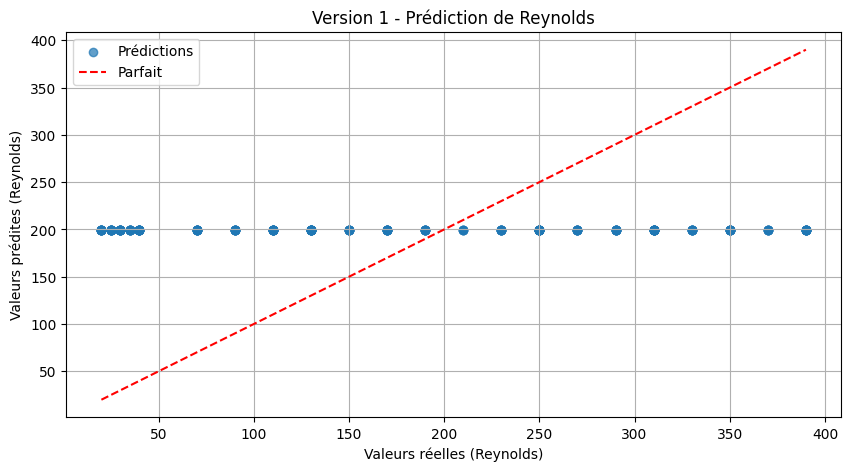

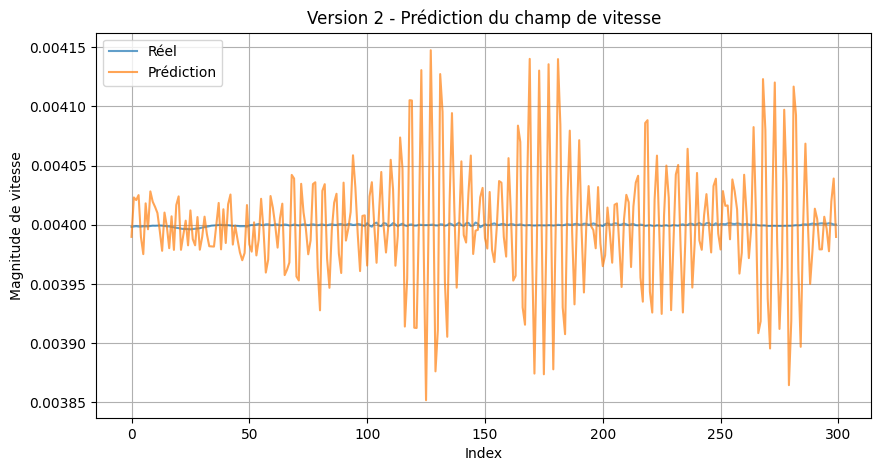

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input, Concatenate, Reshape, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1: Charger les données à partir de plusieurs fichiers
npz_folder = "/content/npz_files"

if not os.path.exists(npz_folder):
    raise FileNotFoundError(f"The folder '{npz_folder}' does not exist. Check the path.")

# Lister tous les fichiers .npz
files = [os.path.join(npz_folder, f) for f in os.listdir(npz_folder) if f.endswith(".npz")]

# Variables pour stocker les données combinées
X_velocity, X_extra, y_reynolds, y_velocity = [], [], [], []

for file in files:
    # Charger le fichier
    data = np.load(file)
    velocity_magnitudes = data['velocity_magnitudes']  # Forme (n, h, w)

    # Extraire Reynolds et vitesse d'entrée depuis le nom de fichier
    file_name = os.path.basename(file)
    reynolds = float(file_name.split("_Re_")[1].split("_")[0])
    velocity_inlet = float(file_name.split("_v_")[1].split(".")[0]) / 1000  # Ajustement si nécessaire

    # Ajouter une dimension de canal pour le CNN
    velocity_magnitudes = velocity_magnitudes[..., np.newaxis]  # Nouvelle forme : (n, h, w, 1)

    # Ajouter aux listes combinées
    X_velocity.append(velocity_magnitudes)
    X_extra.extend([[reynolds, velocity_inlet]] * velocity_magnitudes.shape[0])
    y_reynolds.extend([reynolds] * velocity_magnitudes.shape[0])
    y_velocity.append(velocity_magnitudes)

# Convertir en tableaux NumPy
X_velocity = np.concatenate(X_velocity, axis=0)
y_velocity = np.concatenate(y_velocity, axis=0)
X_extra = np.array(X_extra)
y_reynolds = np.array(y_reynolds)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, X_extra_train, X_extra_test, y_reynolds_train, y_reynolds_test, y_velocity_train, y_velocity_test = train_test_split(
    X_velocity, X_extra, y_reynolds, y_velocity, test_size=0.2, random_state=42
)

# Normalisation des caractéristiques supplémentaires
scaler = StandardScaler()
X_extra_train_scaled = scaler.fit_transform(X_extra_train)
X_extra_test_scaled = scaler.transform(X_extra_test)

# Augmentation des données
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# 2: Version 1 - Prédire Reynolds
cnn_model_reynolds = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Prédiction du Reynolds
])

cnn_model_reynolds.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_reynolds = cnn_model_reynolds.fit(
    datagen.flow(X_train, y_reynolds_train, batch_size=16),
    validation_data=(X_test, y_reynolds_test),
    epochs=50,
    verbose=1
)

# Évaluer le modèle
reynolds_loss, reynolds_mae = cnn_model_reynolds.evaluate(X_test, y_reynolds_test, verbose=0)
reynolds_predictions = cnn_model_reynolds.predict(X_test).flatten()

reynolds_rmse = np.sqrt(mean_squared_error(y_reynolds_test, reynolds_predictions))
reynolds_r2 = r2_score(y_reynolds_test, reynolds_predictions)

print(f"Version 1 - Prédiction de Reynolds:")
print(f"RMSE: {reynolds_rmse:.2f}")
print(f"R²: {reynolds_r2:.2f}")

# 3: Version 2 - Prédire le champ de vitesse
input_reynolds = Input(shape=(X_extra_train_scaled.shape[1],))
input_velocity = Input(shape=X_train.shape[1:])

x = Flatten()(input_velocity)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Concatenate()([x, input_reynolds])
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(np.prod(X_train.shape[1:]), activation='linear')(x)
out = Reshape(X_train.shape[1:])(x)

cnn_model_velocity = Model(inputs=[input_velocity, input_reynolds], outputs=out)

cnn_model_velocity.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

cnn_history_velocity = cnn_model_velocity.fit(
    [X_train, X_extra_train_scaled], y_velocity_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Évaluer le modèle
velocity_loss, velocity_mae = cnn_model_velocity.evaluate([X_test, X_extra_test_scaled], y_velocity_test, verbose=0)
velocity_predictions = cnn_model_velocity.predict([X_test, X_extra_test_scaled])

velocity_rmse = np.sqrt(mean_squared_error(y_velocity_test.flatten(), velocity_predictions.flatten()))

print(f"\nVersion 2 - Prédiction du champ de vitesse:")
print(f"RMSE: {velocity_rmse:.2f}")

# 4: Visualisations
# Visualisation des prédictions Reynolds
plt.figure(figsize=(10, 5))
plt.scatter(y_reynolds_test, reynolds_predictions, alpha=0.7, label='Prédictions')
plt.plot([min(y_reynolds_test), max(y_reynolds_test)], [min(y_reynolds_test), max(y_reynolds_test)], color='red', linestyle='--', label='Parfait')
plt.xlabel('Valeurs réelles (Reynolds)')
plt.ylabel('Valeurs prédites (Reynolds)')
plt.title('Version 1 - Prédiction de Reynolds')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation des prédictions du champ de vitesse
plt.figure(figsize=(10, 5))
plt.plot(y_velocity_test.flatten()[:300], label='Réel', alpha=0.7)
plt.plot(velocity_predictions.flatten()[:300], label='Prédiction', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Magnitude de vitesse')
plt.title('Version 2 - Prédiction du champ de vitesse')
plt.legend()
plt.grid(True)
plt.show()


ajout de rotations et translations afin d'enrichir les données